# Compare JointVAE models

In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [14]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [15]:
df1 = load_experiment_sessions('MoNA', 'jointvae_capacity_nextron', 
    ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
     'experiment05.csv', 'experiment06.csv', 'experiment07.csv', 'experiment08.csv', 
     'experiment09.csv'])
df2 = load_experiment_sessions('HMDB', 'jointvae_capacity_nextron', 
    ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
     'experiment05.csv', 'experiment06.csv', 'experiment07.csv', 'experiment08.csv', 
     'experiment09.csv'])
df = pd.concat([df1, df2], ignore_index=True)
df

,name,dataset,full_model_name,layer_config,latent_spec,input_columns,param_temperature,param_limit,param_dropout,param_cont_min_capacity,...,m_test_cont_capacity_loss,m_test_disc_capacity_loss,m_test_cos_sim,m_test_eu_dist,m_test_per_chag,m_test_per_diff,m_test_avg_cos_sim,m_test_avg_eu_dist,m_test_avg_per_chag,m_test_avg_per_diff
0,jointvae_capacity,MoNA,jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-01-09),"[[100, 100, 3], [3, 100, 100]]","{'cont': 1, 'disc': [2, 6]}",['spectrum'],0.67,1.0,0.0,0.0,...,1.859282,0.049175,0.977778,0.272687,14415.739258,1.242267,0.902587,0.423512,120068.195312,1.412463
1,jointvae_capacity,MoNA,jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-21-00),"[[100, 100, 3], [3, 100, 100]]","{'cont': 1, 'disc': [2, 6]}",['spectrum'],0.67,1.0,0.0,0.0,...,1.838431,0.031811,0.975794,0.283726,13770.537109,1.209957,0.902587,0.423512,120068.195312,1.412463
2,jointvae_capacity,MoNA,jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-39-48),"[[100, 100, 3], [3, 100, 100]]","{'cont': 1, 'disc': [2, 6]}",['spectrum'],0.67,1.0,0.0,0.0,...,1.467187,0.054683,0.974153,0.297739,10032.988281,1.117879,0.902587,0.423512,120068.195312,1.412463
3,jointvae_capacity,MoNA,jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-58-11),"[[100, 100, 3], [3, 100, 100]]","{'cont': 1, 'disc': [2, 6]}",['spectrum'],0.67,1.0,0.0,0.0,...,6.464039,0.049584,0.974257,0.305353,10560.104492,0.986128,0.902587,0.423512,120068.195312,1.412463
4,jointvae_capacity,MoNA,jointvae_capacity_100-100-3-100-100_01 (25-12-2021_18-14-50),"[[100, 100, 3], [3, 100, 100]]","{'cont': 1, 'disc': [2, 6]}",['spectrum'],0.67,1.0,0.0,0.0,...,4.245013,0.048743,0.972676,0.296591,12037.718750,1.195736,0.902587,0.423512,120068.195312,1.412463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-100_09 (16-01-2022_12-21-58),"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,9.193782,0.063917,0.901660,0.459432,3658.768066,0.590804,0.804153,0.593147,61113.636719,0.422391
2426,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-100_09 (16-01-2022_12-30-30),"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,13.650251,0.021778,0.895985,0.447919,11904.351562,0.561147,0.804153,0.593147,61113.636719,0.422391
2427,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-100_09 (16-01-2022_12-38-54),"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,26.042262,0.037851,0.895854,0.462069,9643.476562,0.548639,0.804153,0.593147,61113.636719,0.422391
2428,jointvae_capacity,HMDB,jointvae_capacity_100-100-90-50-2-50-90-100-100_09 (16-01-2022_12-47-18),"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]","{'cont': 1, 'disc': [2]}",['spectrum'],0.67,1.0,0.0,0.0,...,18.259582,0.032689,0.893358,0.449672,15291.647461,0.573306,0.804153,0.593147,61113.636719,0.422391


In [16]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

### Top Models

In [17]:
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.max_rows', 200)

In [18]:
df[['dataset', 'layer_config', 'latent_spec', 'param_cont_max_capacity', 'param_disc_max_capacity', 
    'param_cont_gamma', 'param_disc_gamma', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].sort_values(by=['m_train_cos_sim'], ascending=False).groupby(['dataset']).head(5)

,dataset,layer_config,latent_spec,param_cont_max_capacity,param_disc_max_capacity,param_cont_gamma,param_disc_gamma,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
93,MoNA,"[[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]","{'cont': 1, 'disc': [2, 6]}",5.0,3.0,5.0,5.0,jointvae_capacity_100-1600-200-50-3-50-200-1600-100_01 (26-12-2021_20-45-17),0.968993,0.337851,0.855629,0.878648,0.470888,128981.367188,1.208751
121,MoNA,"[[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]","{'cont': 1, 'disc': [2, 6]}",5.0,5.0,5.0,5.0,jointvae_capacity_100-200-100-50-3-50-100-200-100_01 (27-12-2021_06-13-24),0.968985,0.334216,0.766448,0.878648,0.470888,128981.367188,1.208751
55,MoNA,"[[100, 800, 100, 3], [3, 100, 800, 100]]","{'cont': 1, 'disc': [2, 6]}",3.0,5.0,5.0,5.0,jointvae_capacity_100-800-100-3-100-800-100_01 (26-12-2021_09-05-46),0.968956,0.340554,0.867463,0.878648,0.470888,128981.367188,1.208751
60,MoNA,"[[100, 800, 100, 3], [3, 100, 800, 100]]","{'cont': 1, 'disc': [2, 6]}",10.0,3.0,5.0,5.0,jointvae_capacity_100-800-100-3-100-800-100_01 (26-12-2021_10-35-30),0.968823,0.343715,0.539203,0.878648,0.470888,128981.367188,1.208751
18,MoNA,"[[100, 400, 3], [3, 400, 100]]","{'cont': 1, 'disc': [2, 6]}",3.0,3.0,5.0,5.0,jointvae_capacity_100-400-3-400-100_01 (25-12-2021_22-26-03),0.968769,0.341565,0.909936,0.878648,0.470888,128981.367188,1.208751
1326,HMDB,"[[100, 400, 200, 50, 2], [2, 50, 200, 400, 100]]","{'cont': 1, 'disc': [2]}",5.0,3.0,5.0,5.0,jointvae_capacity_100-400-200-50-2-50-200-400-100_01 (16-01-2022_09-35-35),0.920904,0.381027,0.524096,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]","{'cont': 1, 'disc': [2]}",5.0,3.0,5.0,5.0,jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1317,HMDB,"[[100, 800, 200, 50, 2], [2, 50, 200, 800, 100]]","{'cont': 1, 'disc': [2]}",5.0,3.0,5.0,5.0,jointvae_capacity_100-800-200-50-2-50-200-800-100_01 (16-01-2022_08-18-58),0.919644,0.387090,0.495278,0.801668,0.596705,62756.171875,0.426424
1731,HMDB,"[[100, 400, 200, 50, 2], [2, 50, 200, 400, 100]]","{'cont': 1, 'disc': [2]}",5.0,3.0,5.0,10.0,jointvae_capacity_100-400-200-50-2-50-200-400-100_04 (16-01-2022_09-38-52),0.919476,0.384700,0.509284,0.801668,0.596705,62756.171875,0.426424
1272,HMDB,"[[100, 800, 100, 2], [2, 100, 800, 100]]","{'cont': 1, 'disc': [2]}",5.0,3.0,5.0,5.0,jointvae_capacity_100-800-100-2-100-800-100_01 (16-01-2022_02-18-25),0.919438,0.385552,0.491831,0.801668,0.596705,62756.171875,0.426424


#### Best models grouped by latent_spec and cont_max_capacity

In [19]:
df[['dataset', 'latent_spec', 'param_cont_max_capacity', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_cont_max_capacity', 'layer_config'])['m_train_cos_sim'].idxmax()]

,dataset,latent_spec,param_cont_max_capacity,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1215,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.907069,0.419272,0.427804,0.801668,0.596705,62756.171875,0.426424
1298,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-42-27),0.914418,0.402056,0.490796,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1665,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_00-44-19),0.916180,0.395623,0.488219,0.801668,0.596705,62756.171875,0.426424
1305,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_06-36-56),0.915224,0.398372,0.482264,0.801668,0.596705,62756.171875,0.426424
1251,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_01 (15-01-2022_23-36-37),0.908214,0.414279,0.461815,0.801668,0.596705,62756.171875,0.426424
1288,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-24-21),0.913247,0.401343,0.491004,0.801668,0.596705,62756.171875,0.426424
1334,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_01 (16-01-2022_10-43-33),0.914558,0.400161,0.483224,0.801668,0.596705,62756.171875,0.426424
1225,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_01 (15-01-2022_20-26-28),0.907710,0.415045,0.402330,0.801668,0.596705,62756.171875,0.426424
1278,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-05-47),0.915541,0.400085,0.467968,0.801668,0.596705,62756.171875,0.426424


In [20]:
df[['dataset', 'latent_spec', 'param_cont_max_capacity', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_cont_max_capacity', 'layer_config'])['m_train_eu_dist'].idxmin()]

,dataset,latent_spec,param_cont_max_capacity,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1215,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.907069,0.419272,0.427804,0.801668,0.596705,62756.171875,0.426424
1298,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-42-27),0.914418,0.402056,0.490796,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1665,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_00-44-19),0.916180,0.395623,0.488219,0.801668,0.596705,62756.171875,0.426424
1305,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_06-36-56),0.915224,0.398372,0.482264,0.801668,0.596705,62756.171875,0.426424
1251,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_01 (15-01-2022_23-36-37),0.908214,0.414279,0.461815,0.801668,0.596705,62756.171875,0.426424
1288,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-24-21),0.913247,0.401343,0.491004,0.801668,0.596705,62756.171875,0.426424
1332,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_01 (16-01-2022_10-26-40),0.913235,0.399915,0.520317,0.801668,0.596705,62756.171875,0.426424
1225,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_01 (15-01-2022_20-26-28),0.907710,0.415045,0.402330,0.801668,0.596705,62756.171875,0.426424
1278,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-05-47),0.915541,0.400085,0.467968,0.801668,0.596705,62756.171875,0.426424


In [21]:
df[['dataset', 'latent_spec', 'param_cont_max_capacity', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_cont_max_capacity', 'layer_config'])['m_train_per_diff'].idxmin()]

,dataset,latent_spec,param_cont_max_capacity,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1215,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.907069,0.419272,0.427804,0.801668,0.596705,62756.171875,0.426424
1297,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-34-40),0.910639,0.411905,0.480257,0.801668,0.596705,62756.171875,0.426424
1343,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-58-58),0.915714,0.395835,0.495477,0.801668,0.596705,62756.171875,0.426424
1667,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_01-00-17),0.913008,0.406429,0.454159,0.801668,0.596705,62756.171875,0.426424
1847,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_05 (16-01-2022_06-56-44),0.909750,0.413787,0.447710,0.801668,0.596705,62756.171875,0.426424
1388,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_02 (15-01-2022_23-51-48),0.907690,0.414794,0.439051,0.801668,0.596705,62756.171875,0.426424
1422,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_02 (16-01-2022_04-16-14),0.912177,0.406634,0.443129,0.801668,0.596705,62756.171875,0.426424
1334,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_01 (16-01-2022_10-43-33),0.914558,0.400161,0.483224,0.801668,0.596705,62756.171875,0.426424
1225,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_01 (15-01-2022_20-26-28),0.907710,0.415045,0.402330,0.801668,0.596705,62756.171875,0.426424
1278,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-05-47),0.915541,0.400085,0.467968,0.801668,0.596705,62756.171875,0.426424


#### Best models grouped by latent_spec and disc_max_capacity

In [22]:
df[['dataset', 'latent_spec', 'param_disc_max_capacity', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_disc_max_capacity', 'layer_config'])['m_train_cos_sim'].idxmax()]

,dataset,latent_spec,param_disc_max_capacity,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1215,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.907069,0.419272,0.427804,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1668,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_01-08-23),0.917904,0.387183,0.452430,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1659,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_04 (15-01-2022_23-59-49),0.912898,0.404172,0.471418,0.801668,0.596705,62756.171875,0.426424
1290,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-39-59),0.916179,0.391381,0.447863,0.801668,0.596705,62756.171875,0.426424
2145,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_07 (16-01-2022_10-57-12),0.914918,0.397463,0.576288,0.801668,0.596705,62756.171875,0.426424
1632,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_04 (15-01-2022_20-41-25),0.908746,0.414192,0.401894,0.801668,0.596705,62756.171875,0.426424
1278,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-05-47),0.915541,0.400085,0.467968,0.801668,0.596705,62756.171875,0.426424


In [23]:
df[['dataset', 'latent_spec', 'param_disc_max_capacity', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_disc_max_capacity', 'layer_config'])['m_train_eu_dist'].idxmin()]

,dataset,latent_spec,param_disc_max_capacity,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
2028,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_07 (15-01-2022_19-33-57),0.906002,0.419078,0.426679,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1668,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_01-08-23),0.917904,0.387183,0.452430,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1659,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_04 (15-01-2022_23-59-49),0.912898,0.404172,0.471418,0.801668,0.596705,62756.171875,0.426424
1290,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-39-59),0.916179,0.391381,0.447863,0.801668,0.596705,62756.171875,0.426424
2145,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_07 (16-01-2022_10-57-12),0.914918,0.397463,0.576288,0.801668,0.596705,62756.171875,0.426424
1632,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_04 (15-01-2022_20-41-25),0.908746,0.414192,0.401894,0.801668,0.596705,62756.171875,0.426424
1278,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-05-47),0.915541,0.400085,0.467968,0.801668,0.596705,62756.171875,0.426424


In [24]:
df[['dataset', 'latent_spec', 'param_disc_max_capacity', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_disc_max_capacity', 'layer_config'])['m_train_per_diff'].idxmin()]

,dataset,latent_spec,param_disc_max_capacity,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1218,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-33-55),0.905562,0.420876,0.424026,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
2154,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_07 (16-01-2022_12-13-22),0.915405,0.399159,0.493572,0.801668,0.596705,62756.171875,0.426424
1668,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_01-08-23),0.917904,0.387183,0.452430,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1521,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_03 (15-01-2022_23-37-27),0.896512,0.443546,0.451582,0.801668,0.596705,62756.171875,0.426424
1422,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_02 (16-01-2022_04-16-14),0.912177,0.406634,0.443129,0.801668,0.596705,62756.171875,0.426424
1740,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_04 (16-01-2022_10-55-29),0.911797,0.407965,0.477081,0.801668,0.596705,62756.171875,0.426424
2037,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_07 (15-01-2022_20-41-09),0.907351,0.414423,0.401607,0.801668,0.596705,62756.171875,0.426424
2226,HMDB,"{'cont': 1, 'disc': [2]}",3.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_08 (16-01-2022_03-31-09),0.897888,0.446202,0.459783,0.801668,0.596705,62756.171875,0.426424


#### Best models grouped by latent_spec and cont_gamma

In [25]:
df[['dataset', 'latent_spec', 'param_cont_gamma', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_cont_gamma', 'layer_config'])['m_train_cos_sim'].idxmax()]

,dataset,latent_spec,param_cont_gamma,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1215,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.907069,0.419272,0.427804,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1668,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_01-08-23),0.917904,0.387183,0.452430,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1659,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_04 (15-01-2022_23-59-49),0.912898,0.404172,0.471418,0.801668,0.596705,62756.171875,0.426424
1290,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-39-59),0.916179,0.391381,0.447863,0.801668,0.596705,62756.171875,0.426424
2145,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_07 (16-01-2022_10-57-12),0.914918,0.397463,0.576288,0.801668,0.596705,62756.171875,0.426424
1632,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_04 (15-01-2022_20-41-25),0.908746,0.414192,0.401894,0.801668,0.596705,62756.171875,0.426424
1282,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-37-06),0.916996,0.393493,0.508789,0.801668,0.596705,62756.171875,0.426424


In [26]:
df[['dataset', 'latent_spec', 'param_cont_gamma', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_cont_gamma', 'layer_config'])['m_train_eu_dist'].idxmin()]

,dataset,latent_spec,param_cont_gamma,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
2028,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_07 (15-01-2022_19-33-57),0.906002,0.419078,0.426679,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1668,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_01-08-23),0.917904,0.387183,0.452430,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1659,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_04 (15-01-2022_23-59-49),0.912898,0.404172,0.471418,0.801668,0.596705,62756.171875,0.426424
1290,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-39-59),0.916179,0.391381,0.447863,0.801668,0.596705,62756.171875,0.426424
2145,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_07 (16-01-2022_10-57-12),0.914918,0.397463,0.576288,0.801668,0.596705,62756.171875,0.426424
1632,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_04 (15-01-2022_20-41-25),0.908746,0.414192,0.401894,0.801668,0.596705,62756.171875,0.426424
1282,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-37-06),0.916996,0.393493,0.508789,0.801668,0.596705,62756.171875,0.426424


In [27]:
df[['dataset', 'latent_spec', 'param_cont_gamma', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_cont_gamma', 'layer_config'])['m_train_per_diff'].idxmin()]

,dataset,latent_spec,param_cont_gamma,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
2029,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_07 (15-01-2022_19-41-13),0.905569,0.422066,0.422917,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1346,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_12-24-30),0.913875,0.398088,0.486239,0.801668,0.596705,62756.171875,0.426424
1668,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_04 (16-01-2022_01-08-23),0.917904,0.387183,0.452430,0.801668,0.596705,62756.171875,0.426424
1306,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_06-45-20),0.913234,0.402992,0.457770,0.801668,0.596705,62756.171875,0.426424
1256,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_01 (16-01-2022_00-13-26),0.907916,0.415194,0.446258,0.801668,0.596705,62756.171875,0.426424
1290,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-39-59),0.916179,0.391381,0.447863,0.801668,0.596705,62756.171875,0.426424
1740,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_04 (16-01-2022_10-55-29),0.911797,0.407965,0.477081,0.801668,0.596705,62756.171875,0.426424
2037,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_07 (15-01-2022_20-41-09),0.907351,0.414423,0.401607,0.801668,0.596705,62756.171875,0.426424
2091,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_07 (16-01-2022_03-31-02),0.907655,0.415827,0.461156,0.801668,0.596705,62756.171875,0.426424


#### Best models grouped by latent_spec and disc_gamma

In [28]:
df[['dataset', 'latent_spec', 'param_disc_gamma', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_disc_gamma', 'layer_config'])['m_train_cos_sim'].idxmax()]

,dataset,latent_spec,param_disc_gamma,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1215,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.907069,0.419272,0.427804,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1260,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_01 (16-01-2022_00-42-47),0.915651,0.397864,0.516808,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1254,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_01 (15-01-2022_23-58-44),0.911572,0.411246,0.455078,0.801668,0.596705,62756.171875,0.426424
1290,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-39-59),0.916179,0.391381,0.447863,0.801668,0.596705,62756.171875,0.426424
1334,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_01 (16-01-2022_10-43-33),0.914558,0.400161,0.483224,0.801668,0.596705,62756.171875,0.426424
1225,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_01 (15-01-2022_20-26-28),0.907710,0.415045,0.402330,0.801668,0.596705,62756.171875,0.426424
1282,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-37-06),0.916996,0.393493,0.508789,0.801668,0.596705,62756.171875,0.426424


In [29]:
df[['dataset', 'latent_spec', 'param_disc_gamma', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_disc_gamma', 'layer_config'])['m_train_eu_dist'].idxmin()]

,dataset,latent_spec,param_disc_gamma,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1215,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-11-40),0.907069,0.419272,0.427804,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1341,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_11-42-12),0.916010,0.394871,0.508137,0.801668,0.596705,62756.171875,0.426424
1260,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_01 (16-01-2022_00-42-47),0.915651,0.397864,0.516808,0.801668,0.596705,62756.171875,0.426424
1308,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_07-02-25),0.920545,0.382374,0.471390,0.801668,0.596705,62756.171875,0.426424
1254,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_01 (15-01-2022_23-58-44),0.911572,0.411246,0.455078,0.801668,0.596705,62756.171875,0.426424
1290,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_01 (16-01-2022_04-39-59),0.916179,0.391381,0.447863,0.801668,0.596705,62756.171875,0.426424
1332,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_01 (16-01-2022_10-26-40),0.913235,0.399915,0.520317,0.801668,0.596705,62756.171875,0.426424
1225,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_01 (15-01-2022_20-26-28),0.907710,0.415045,0.402330,0.801668,0.596705,62756.171875,0.426424
1282,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-37-06),0.916996,0.393493,0.508789,0.801668,0.596705,62756.171875,0.426424


In [30]:
df[['dataset', 'latent_spec', 'param_disc_gamma', 'layer_config', 'full_model_name', 
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff',
    'm_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']].loc[
    df.groupby(['dataset', 'latent_spec', 'param_disc_gamma', 'layer_config'])['m_train_per_diff'].idxmin()]

,dataset,latent_spec,param_disc_gamma,layer_config,full_model_name,m_train_cos_sim,m_train_eu_dist,m_train_per_diff,m_train_avg_cos_sim,m_train_avg_eu_dist,m_train_avg_per_chag,m_train_avg_per_diff
1218,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 2], [2, 100, 100]]",jointvae_capacity_100-100-2-100-100_01 (15-01-2022_19-33-55),0.905562,0.420876,0.424026,0.801668,0.596705,62756.171875,0.426424
1299,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 2], [2, 90, 100, 100]]",jointvae_capacity_100-100-90-2-90-100-100_01 (16-01-2022_05-50-08),0.915626,0.398804,0.460330,0.801668,0.596705,62756.171875,0.426424
1346,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 100, 90, 50, 2], [2, 50, 90, 100, 100]]",jointvae_capacity_100-100-90-50-2-50-90-100-100_01 (16-01-2022_12-24-30),0.913875,0.398088,0.486239,0.801668,0.596705,62756.171875,0.426424
1262,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 100, 2], [2, 100, 1600, 100]]",jointvae_capacity_100-1600-100-2-100-1600-100_01 (16-01-2022_00-58-51),0.912934,0.403040,0.459758,0.801668,0.596705,62756.171875,0.426424
1306,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 200, 50, 2], [2, 50, 200, 1600, 100]]",jointvae_capacity_100-1600-200-50-2-50-200-1600-100_01 (16-01-2022_06-45-20),0.913234,0.402992,0.457770,0.801668,0.596705,62756.171875,0.426424
1388,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 1600, 2], [2, 1600, 100]]",jointvae_capacity_100-1600-2-1600-100_02 (15-01-2022_23-51-48),0.907690,0.414794,0.439051,0.801668,0.596705,62756.171875,0.426424
1422,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 2], [2, 100, 200, 100]]",jointvae_capacity_100-200-100-2-100-200-100_02 (16-01-2022_04-16-14),0.912177,0.406634,0.443129,0.801668,0.596705,62756.171875,0.426424
1334,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 100, 50, 2], [2, 50, 100, 200, 100]]",jointvae_capacity_100-200-100-50-2-50-100-200-100_01 (16-01-2022_10-43-33),0.914558,0.400161,0.483224,0.801668,0.596705,62756.171875,0.426424
1227,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 200, 2], [2, 200, 100]]",jointvae_capacity_100-200-2-200-100_01 (15-01-2022_20-41-15),0.906652,0.416115,0.401652,0.801668,0.596705,62756.171875,0.426424
1278,HMDB,"{'cont': 1, 'disc': [2]}",5.0,"[[100, 400, 100, 2], [2, 100, 400, 100]]",jointvae_capacity_100-400-100-2-100-400-100_01 (16-01-2022_03-05-47),0.915541,0.400085,0.467968,0.801668,0.596705,62756.171875,0.426424


## Scores vs. architecture

In [31]:
vae_scores = ['m_train_cos_sim', 'm_train_eu_dist', 'm_train_per_chag', 'm_train_per_diff']
vae_avg_scores = ['m_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']

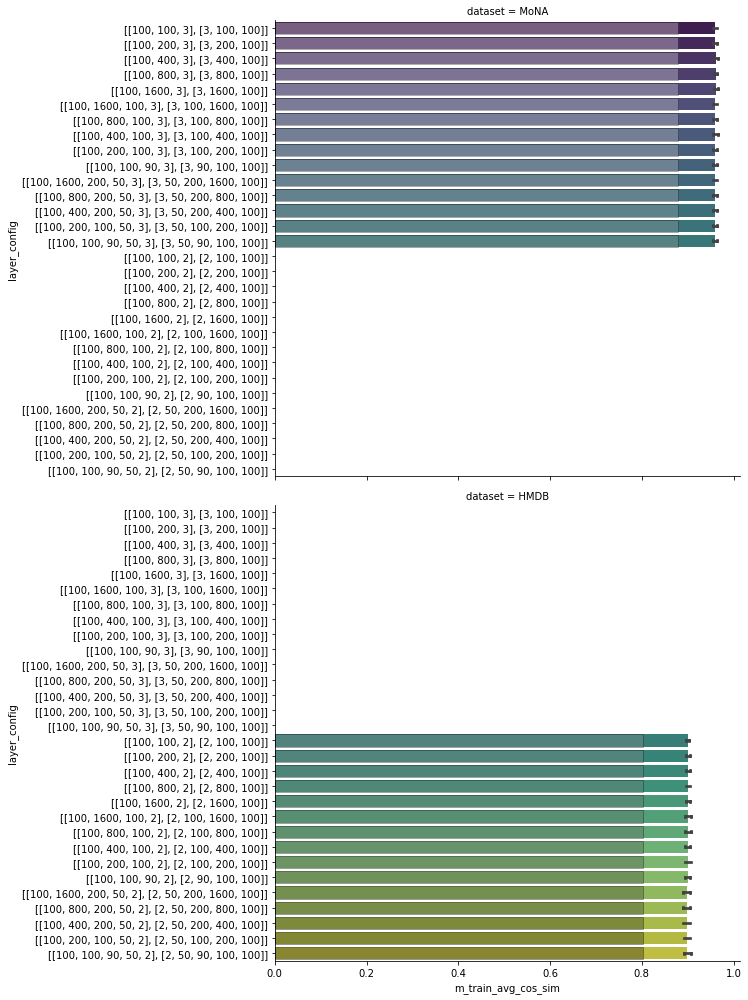

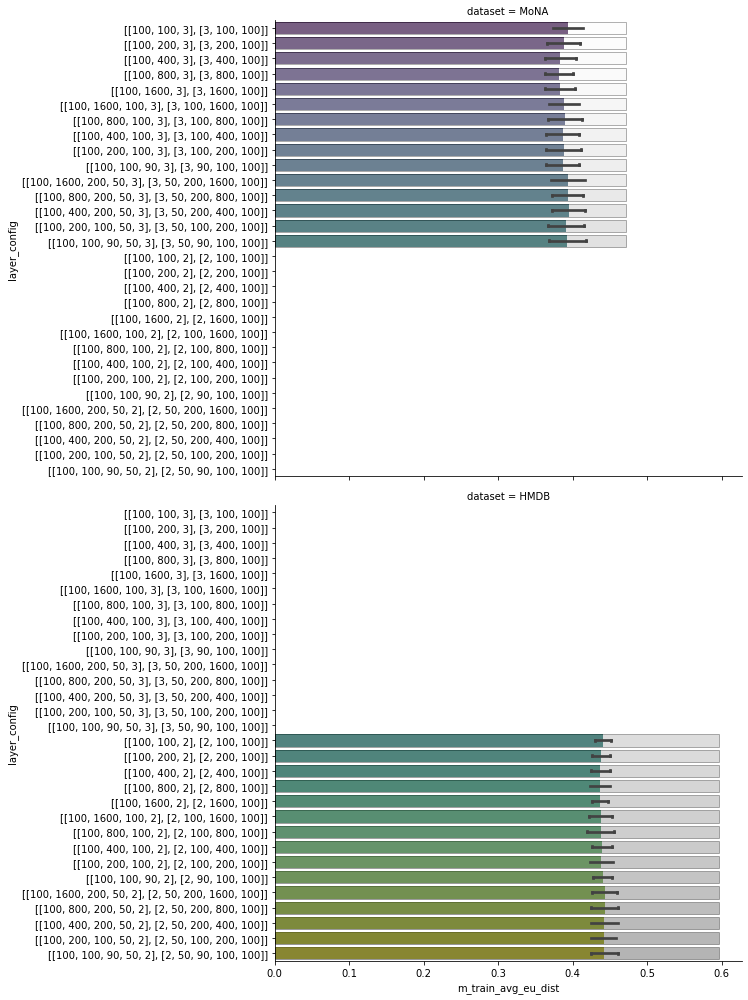

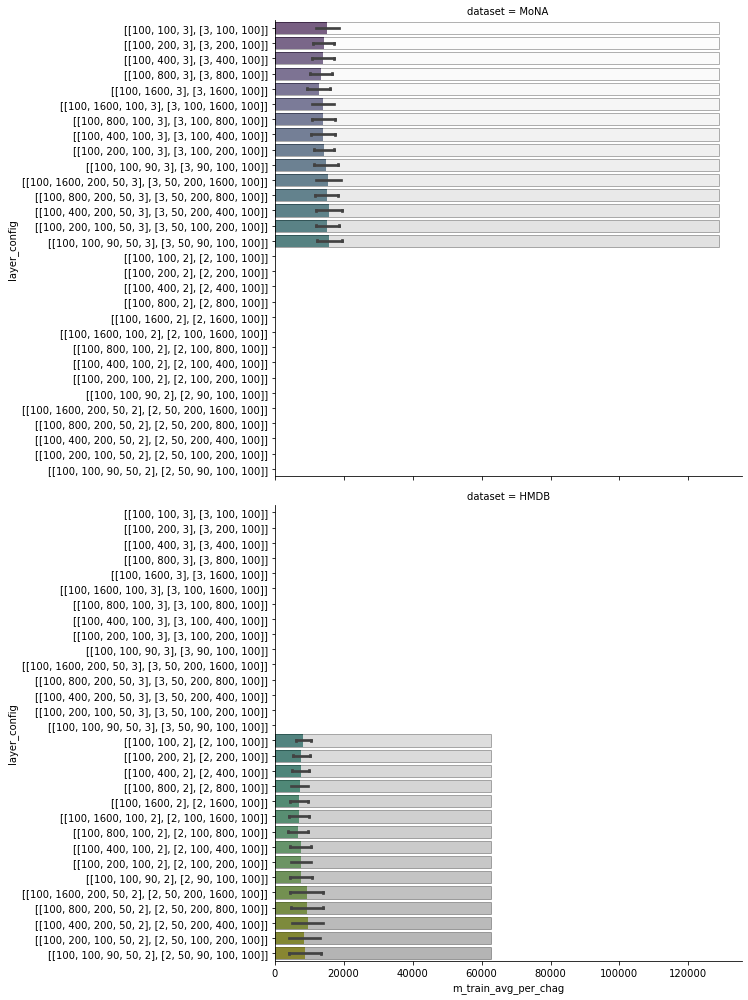

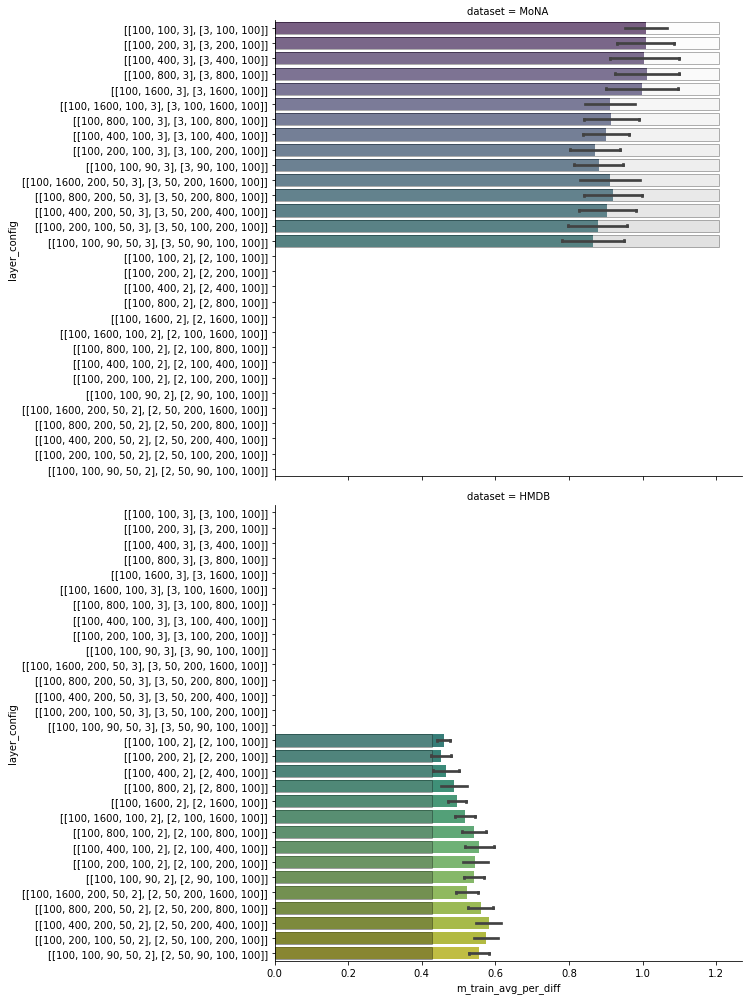

In [32]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x=column, y="layer_config", row='dataset',
        kind="bar", ci="sd", capsize=.05, aspect=1.5, palette='viridis', saturation=0.6, height=7)
    ax.map(sns.barplot, avg_column, "layer_config", data=df, alpha=0.3, linewidth=1., palette='Greys', 
        edgecolor="black", ci=None, order=df['layer_config'].unique().tolist())

## Scores vs. cont_max_capacity

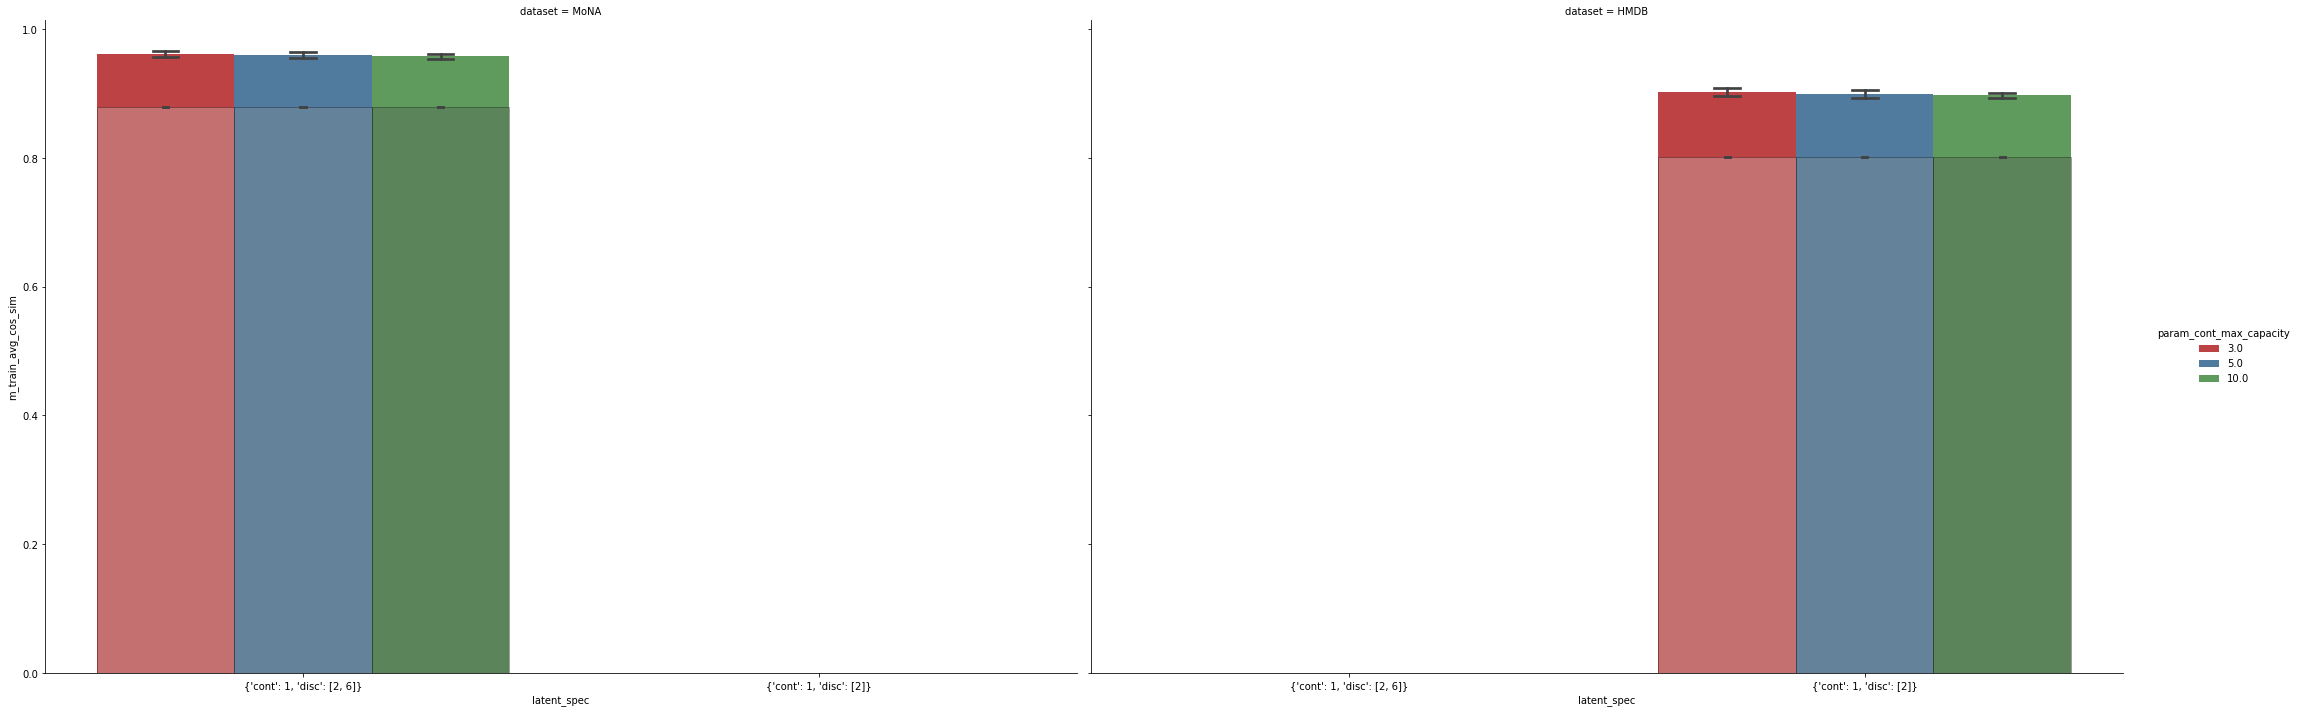

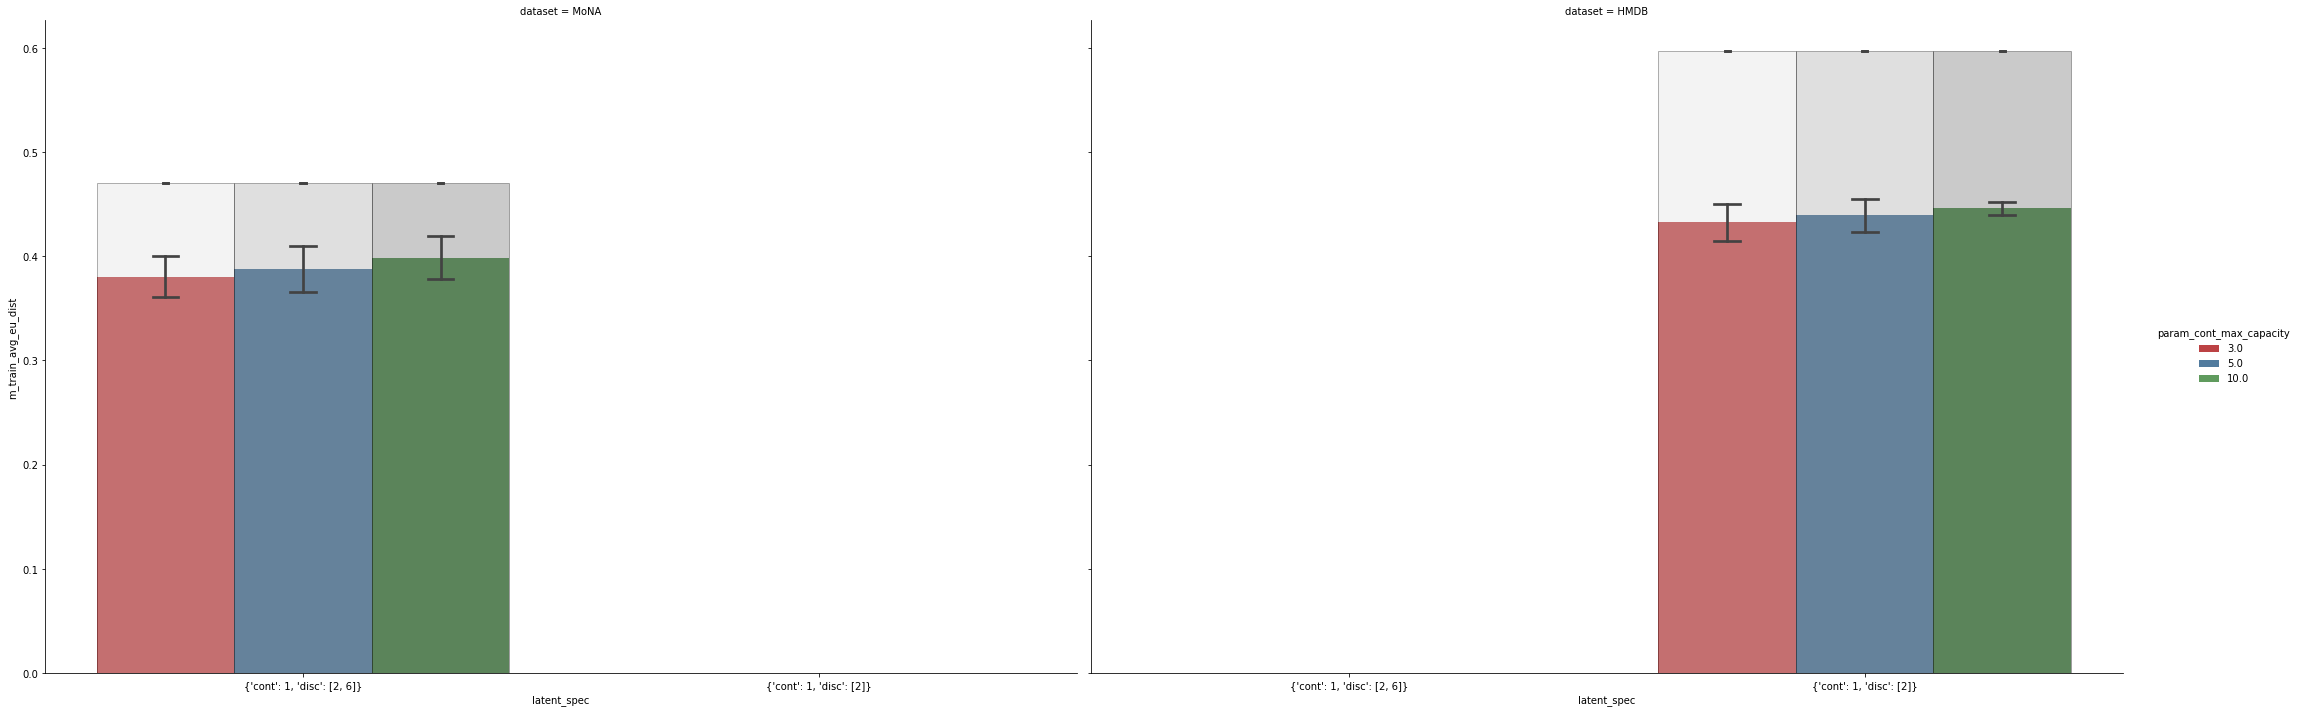

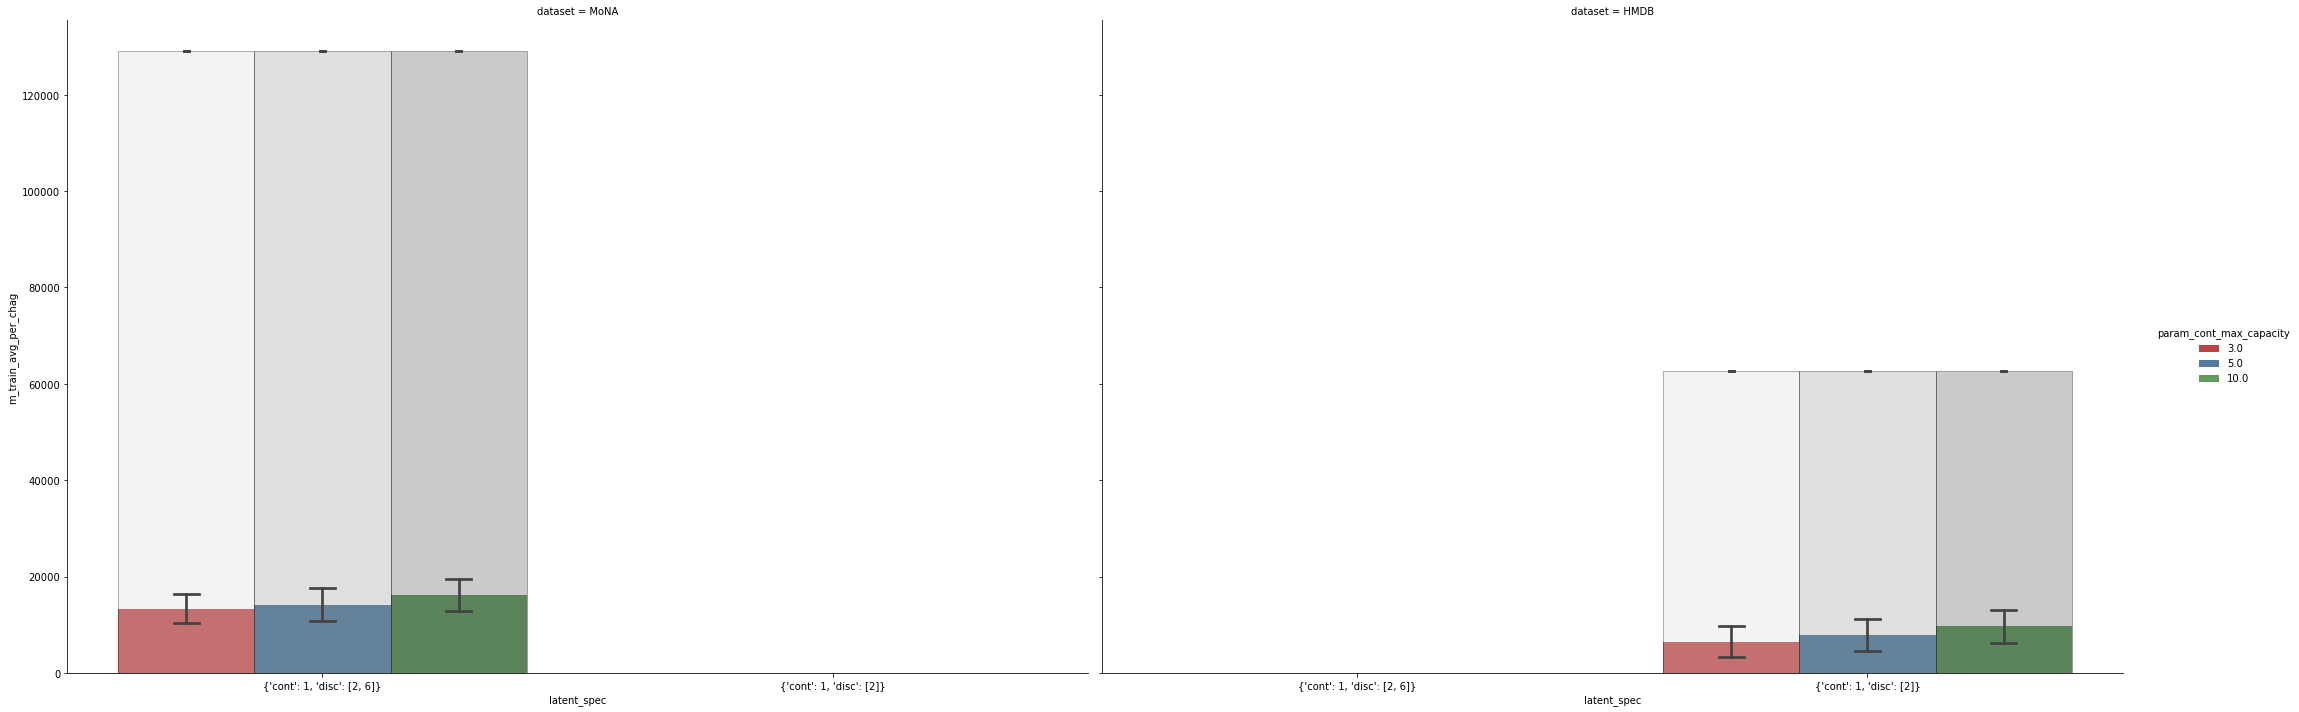

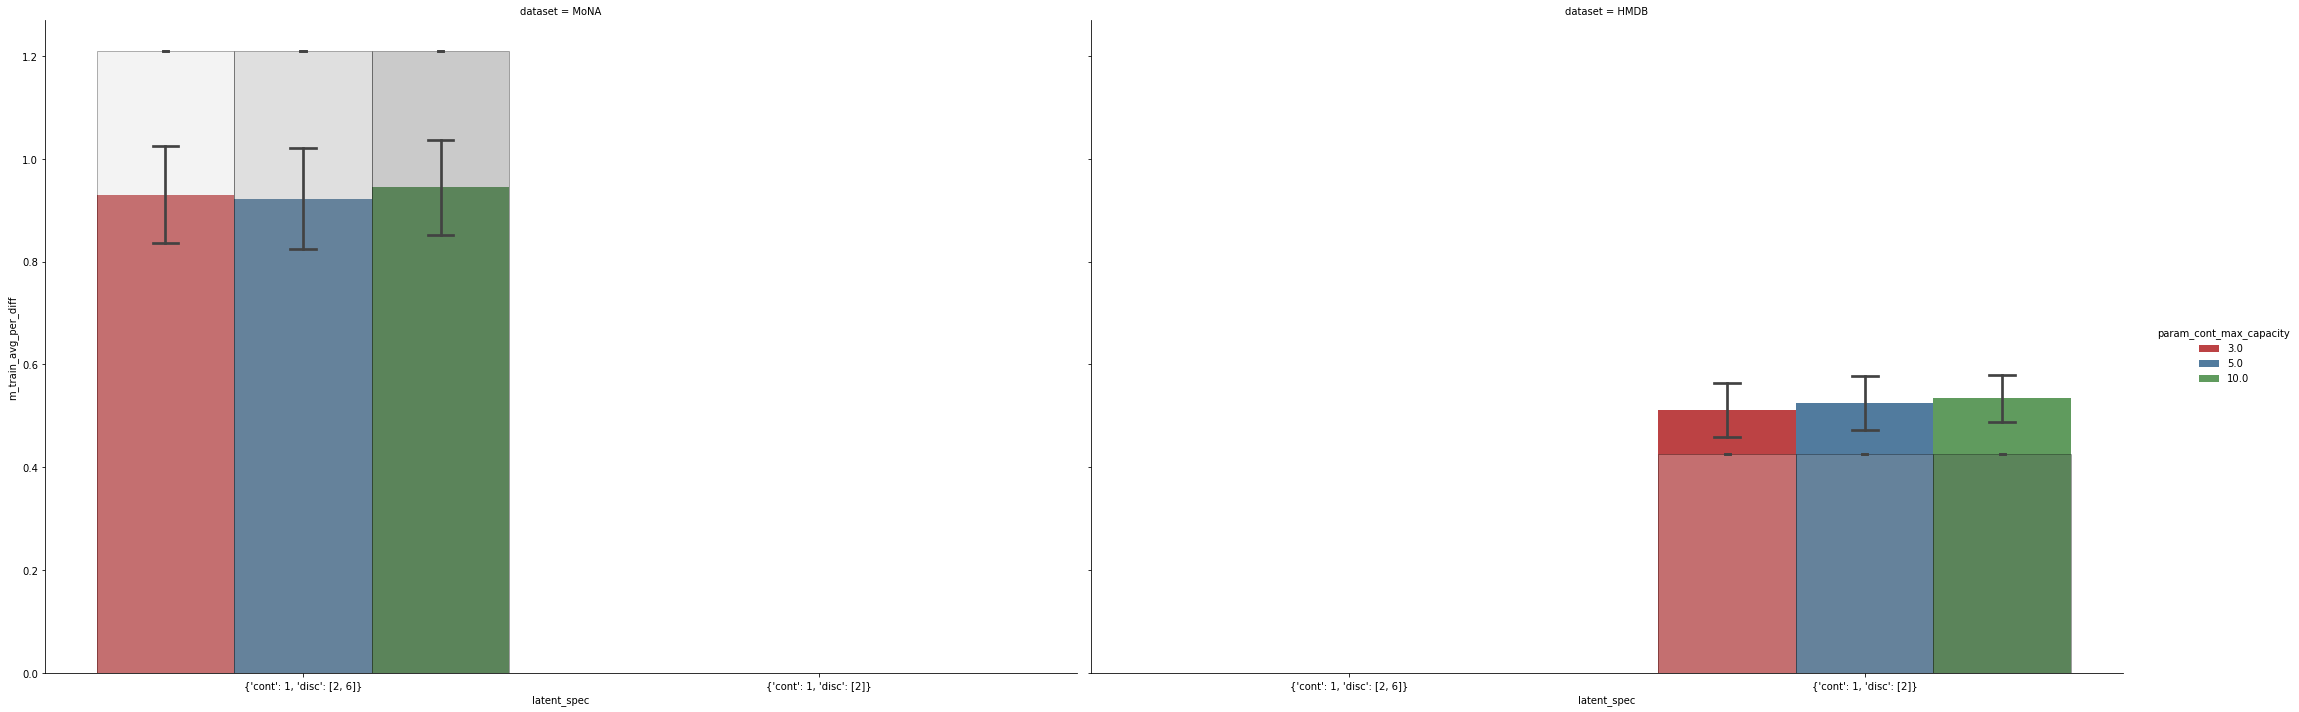

In [33]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x="latent_spec", y=column, col='dataset',
        hue='param_cont_max_capacity', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'latent_spec', avg_column, data=df, hue='param_cont_max_capacity', order=df['latent_spec'].unique().tolist(),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")

## Scores vs disc_max_capacity

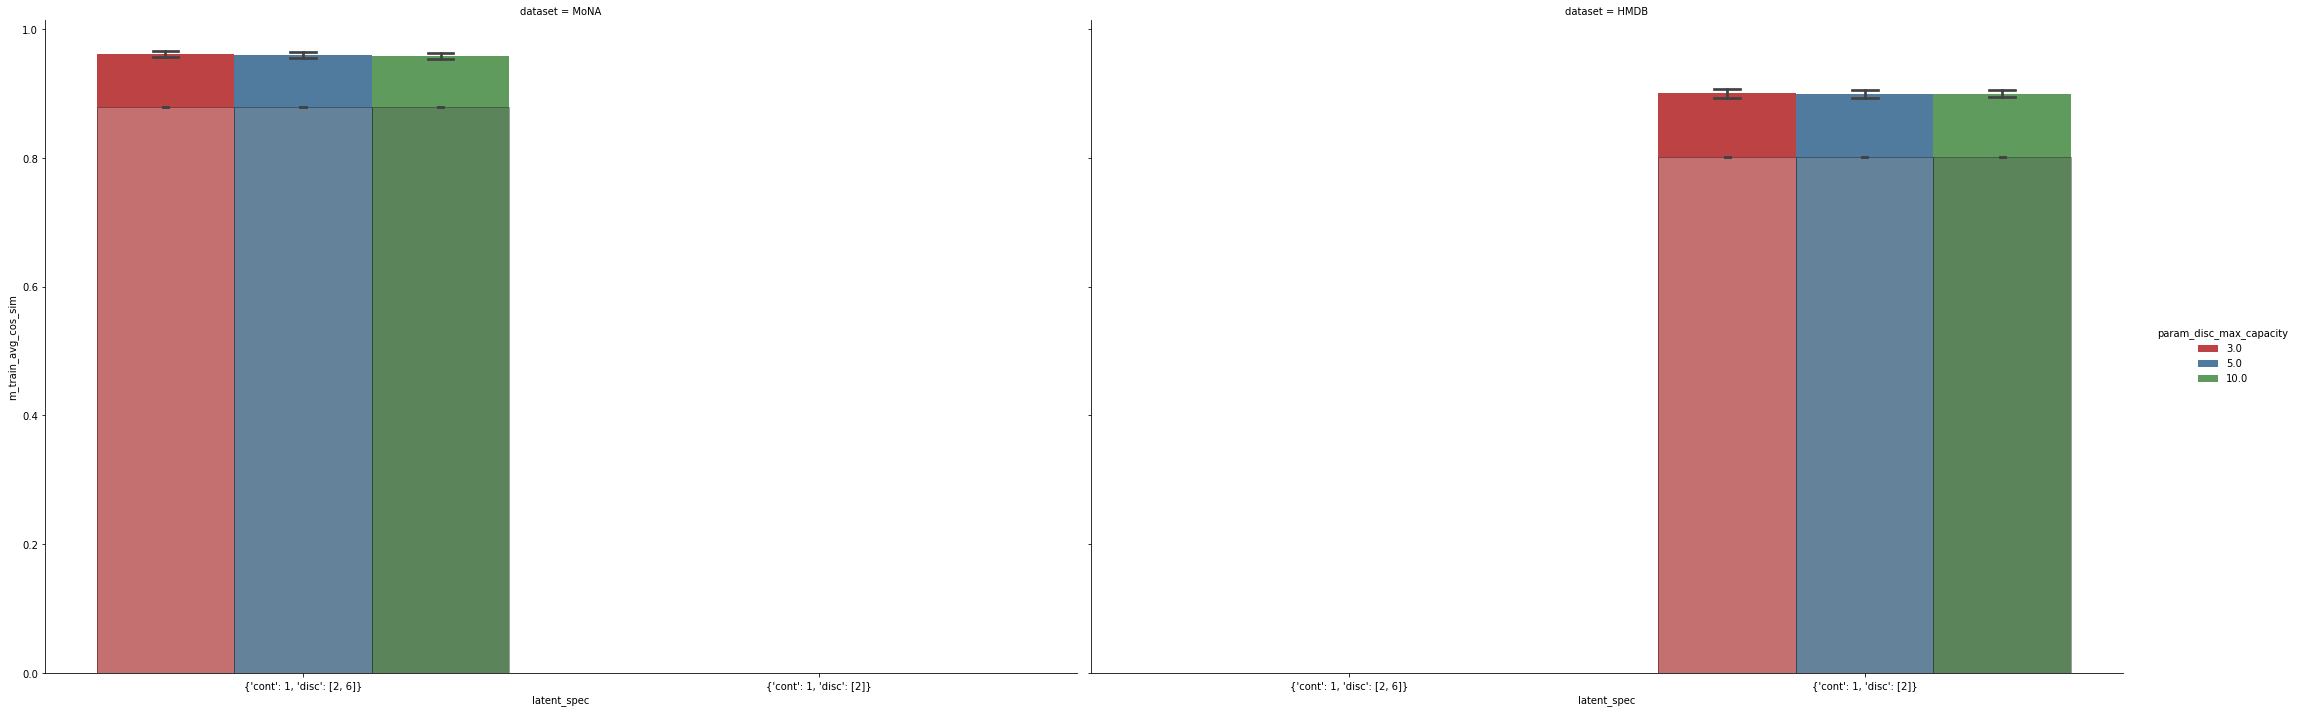

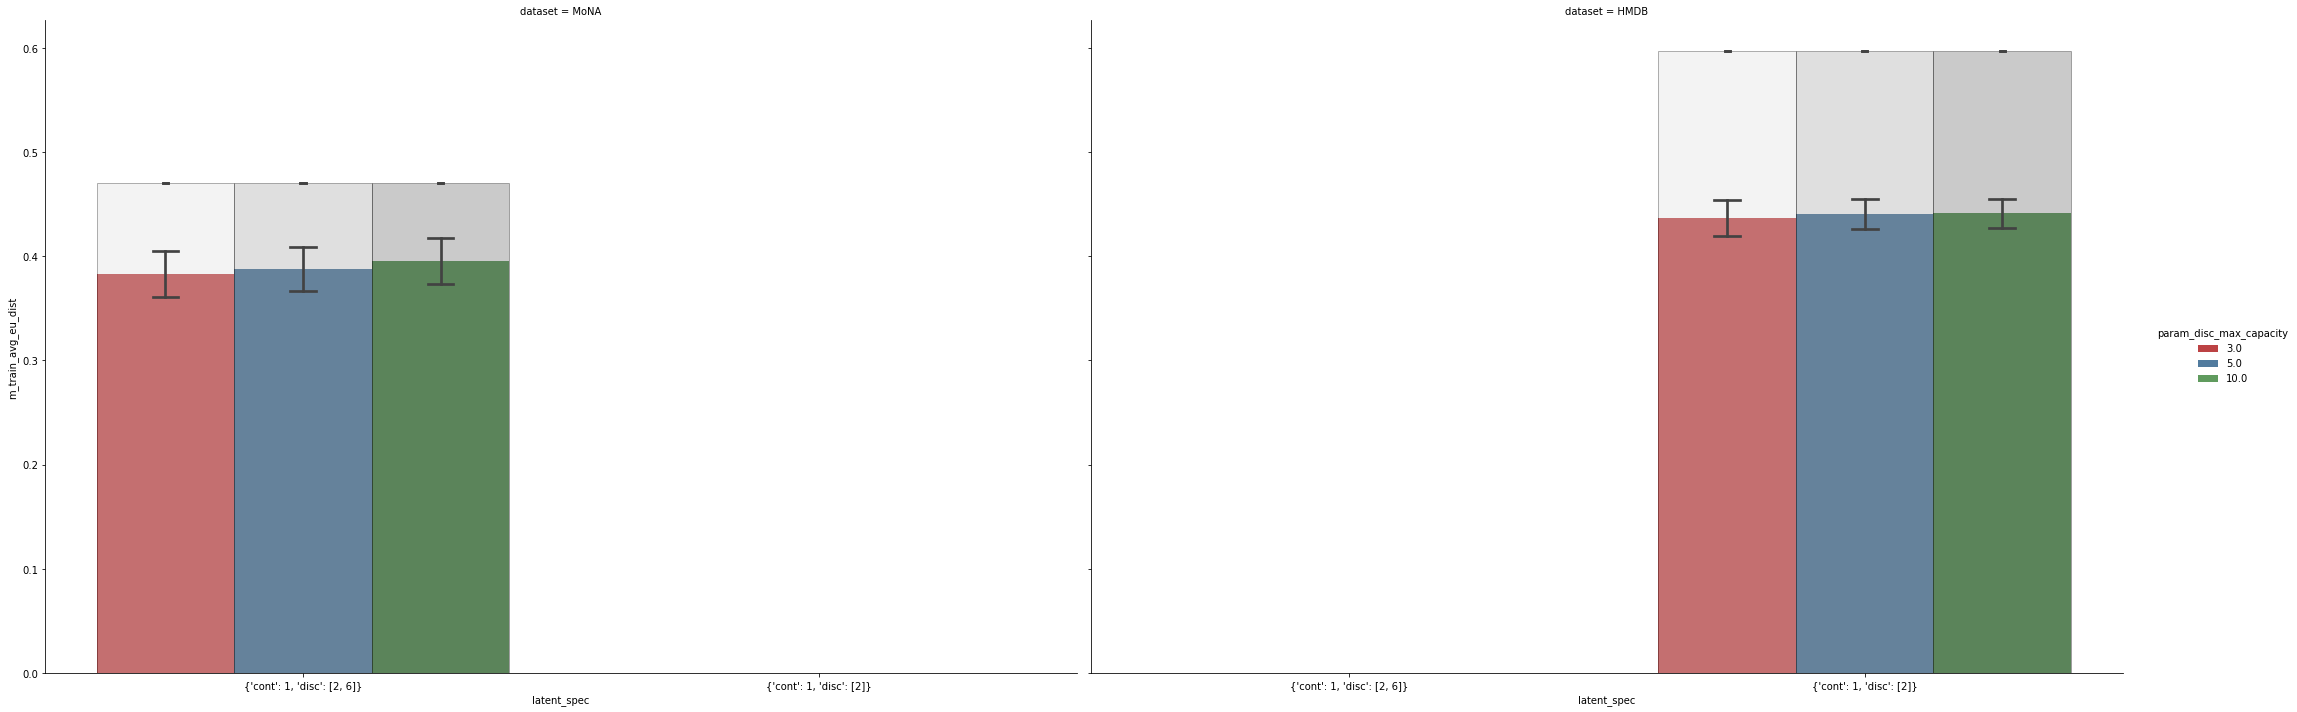

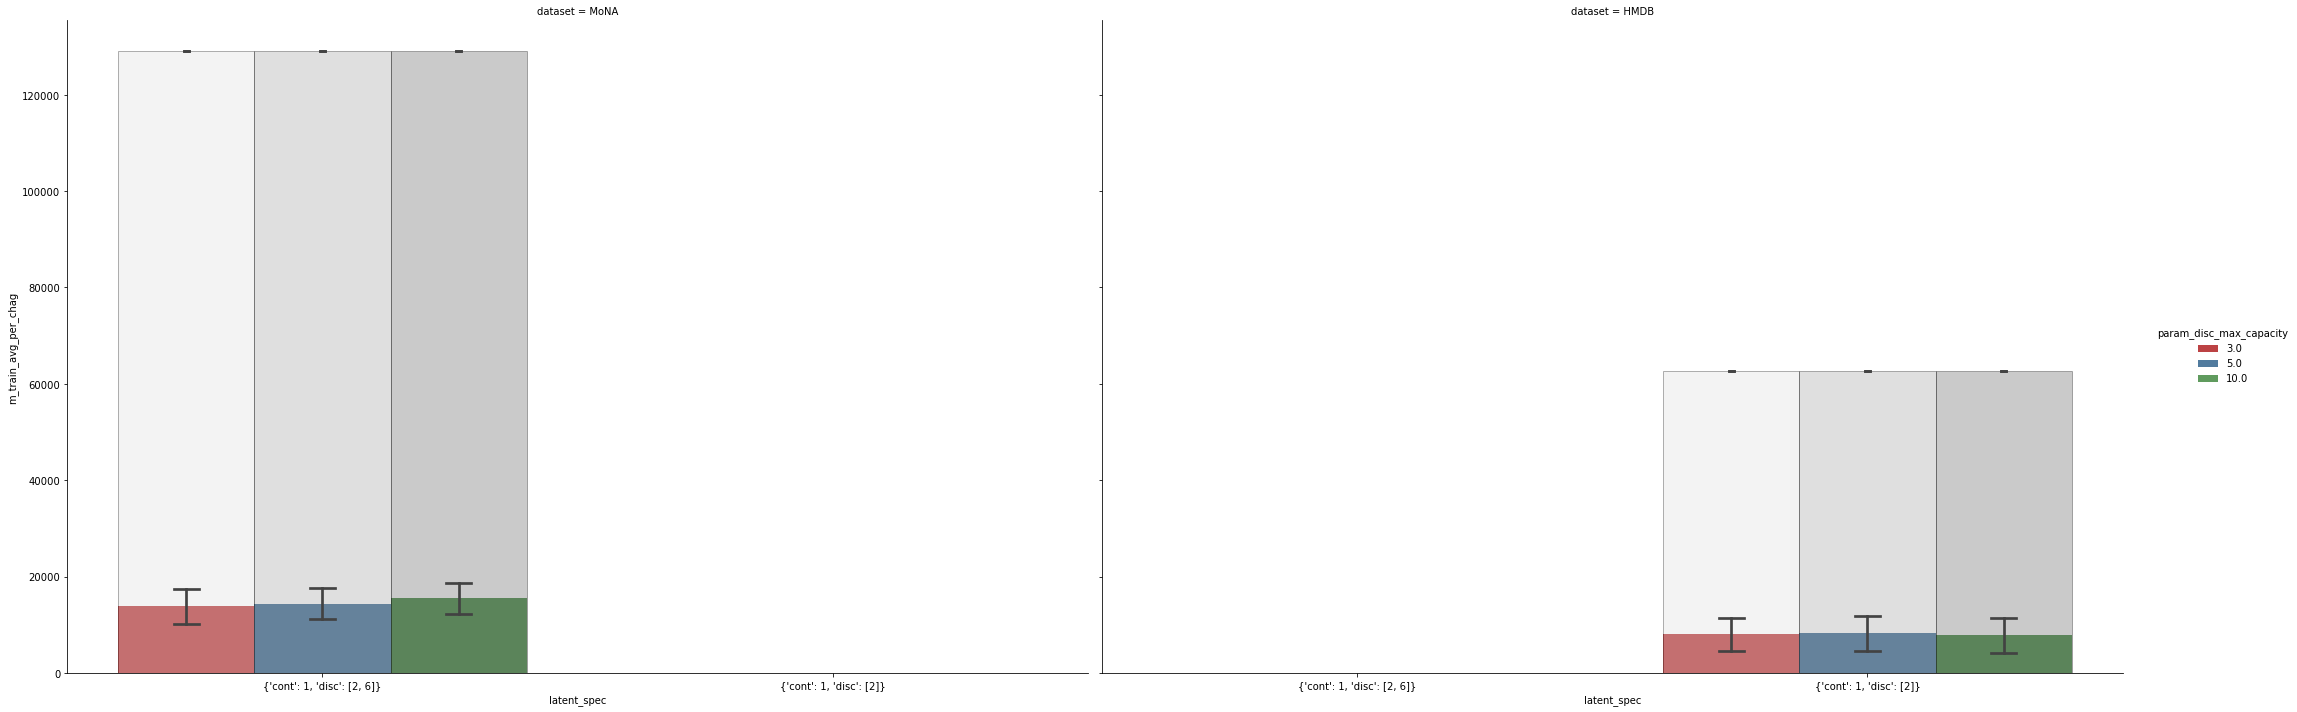

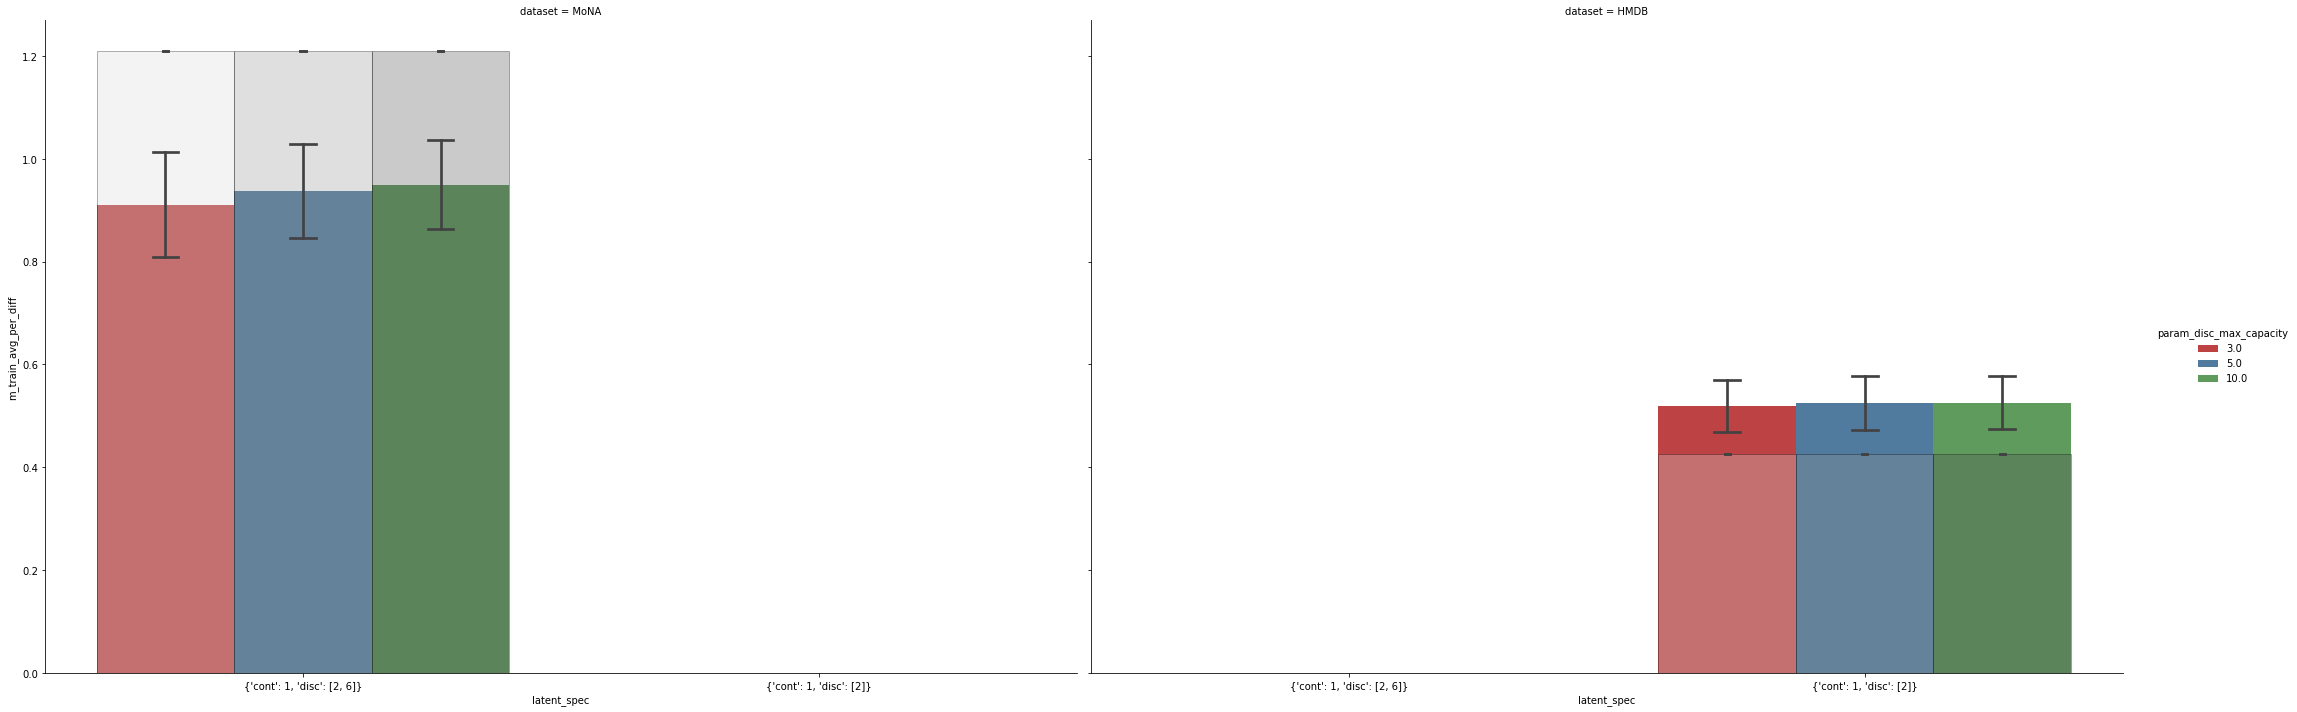

In [34]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x="latent_spec", y=column, col='dataset',
        hue='param_disc_max_capacity', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'latent_spec', avg_column, data=df, hue='param_disc_max_capacity', order=df['latent_spec'].unique().tolist(),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")

## Scores vs cont_gamma

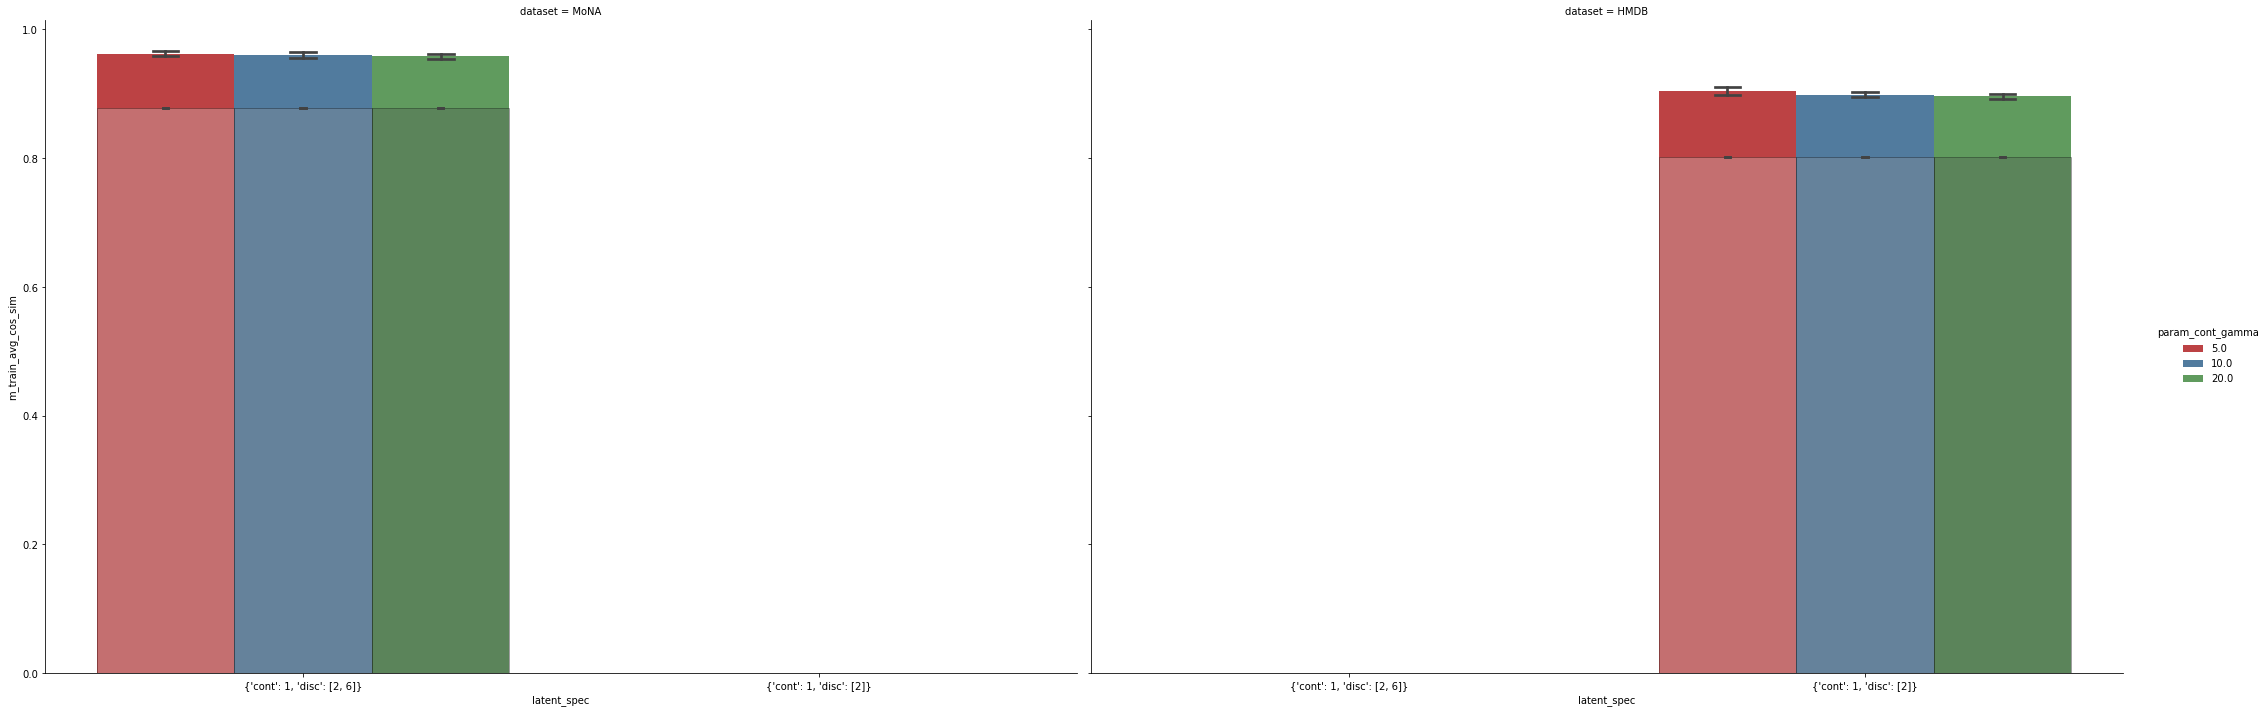

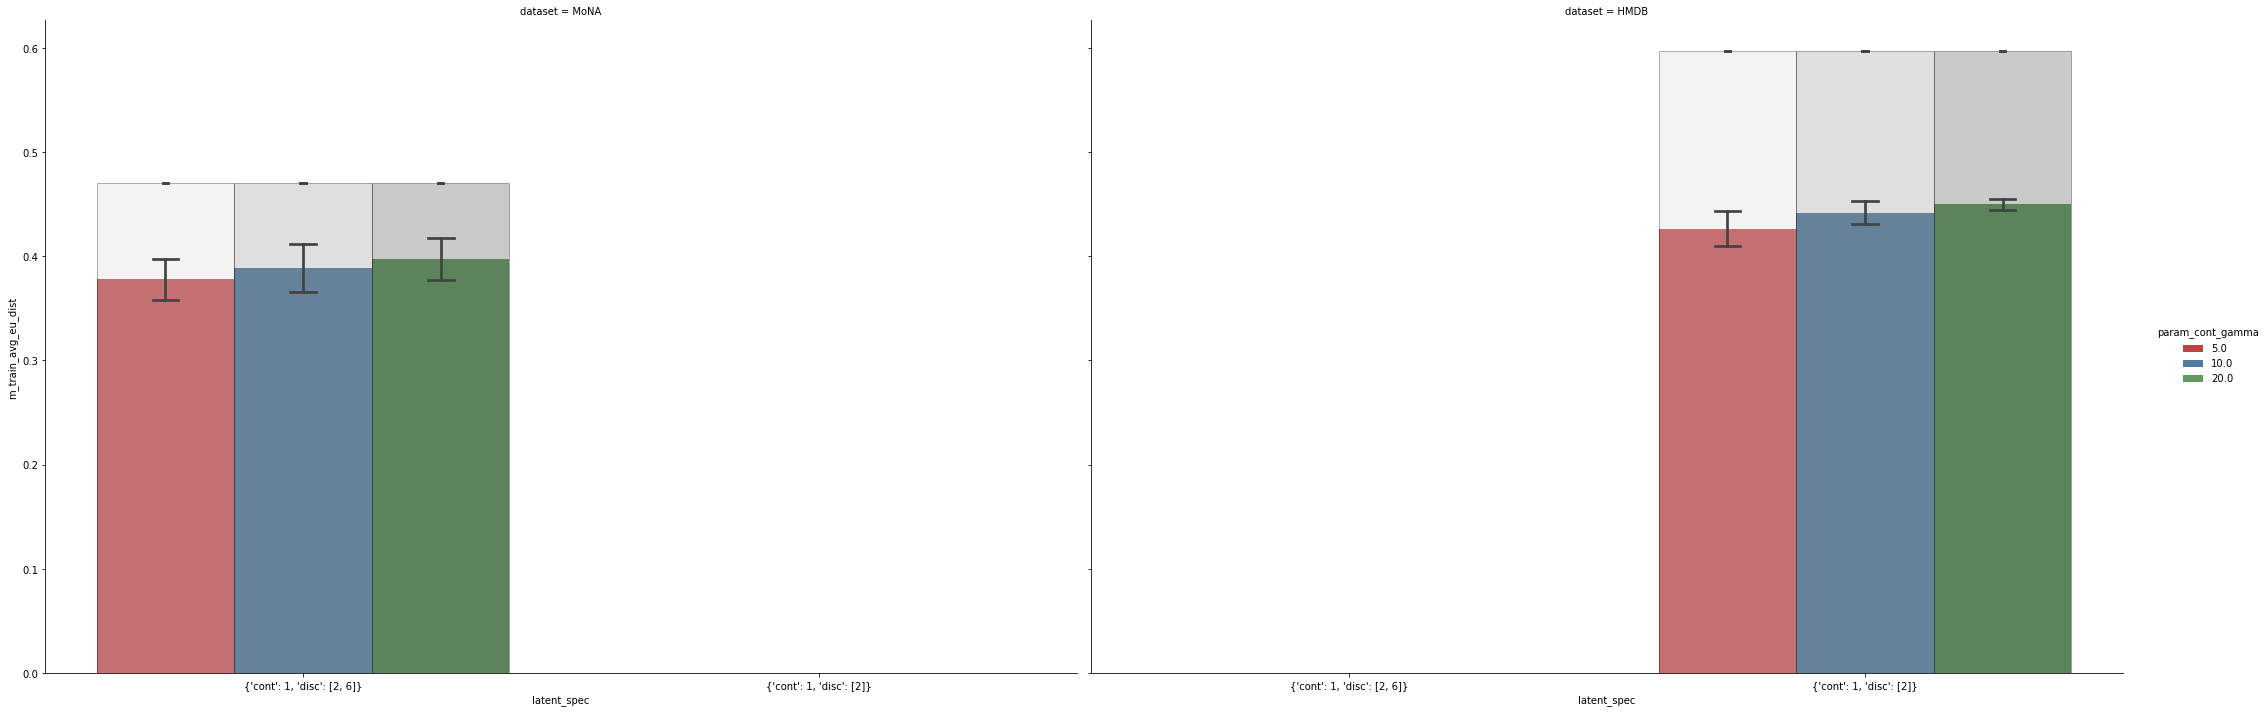

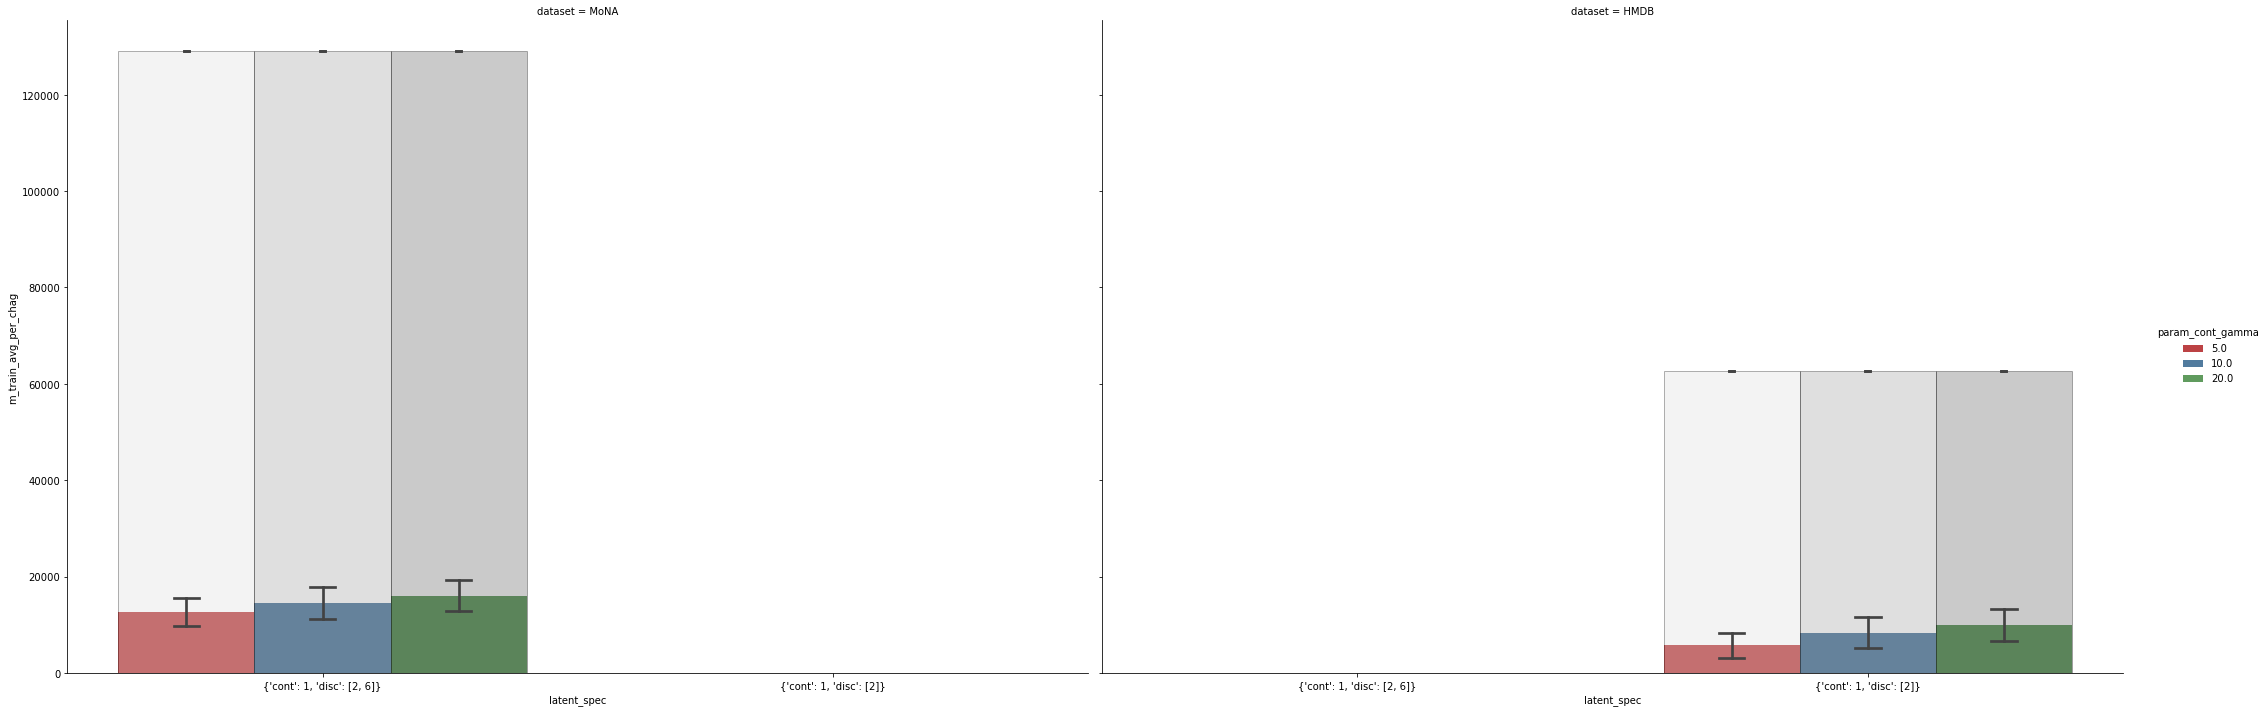

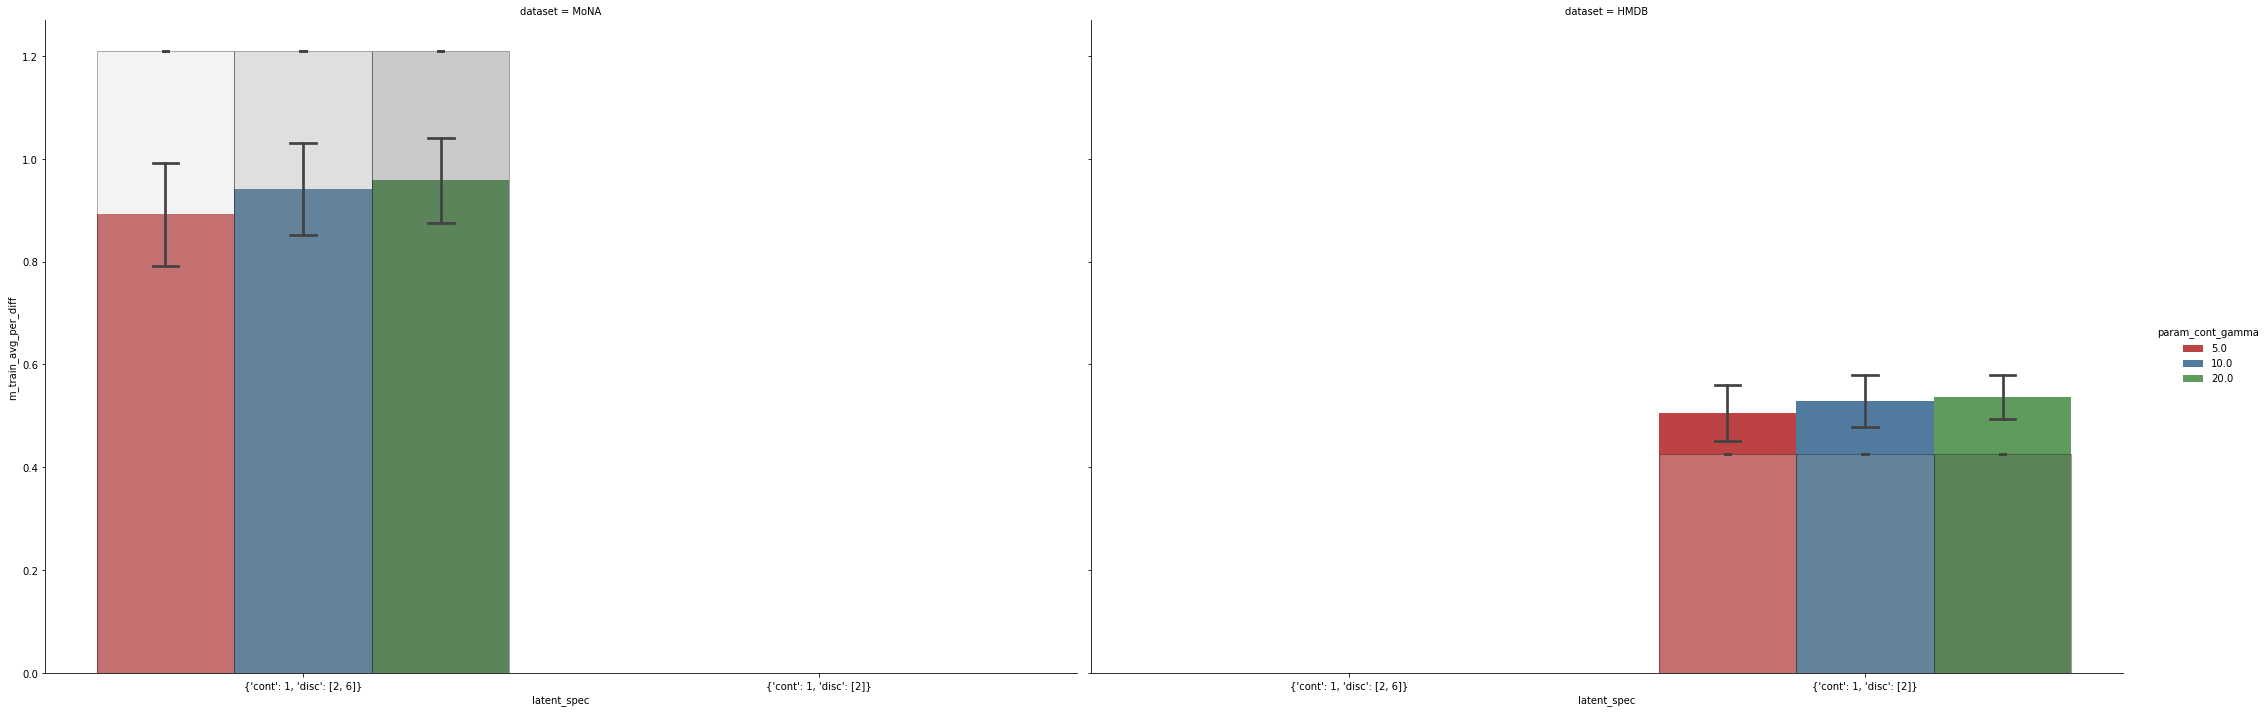

In [35]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x="latent_spec", y=column, col='dataset',
        hue='param_cont_gamma', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'latent_spec', avg_column, data=df, hue='param_cont_gamma', order=df['latent_spec'].unique().tolist(),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")

## Scores vs disc_gamma

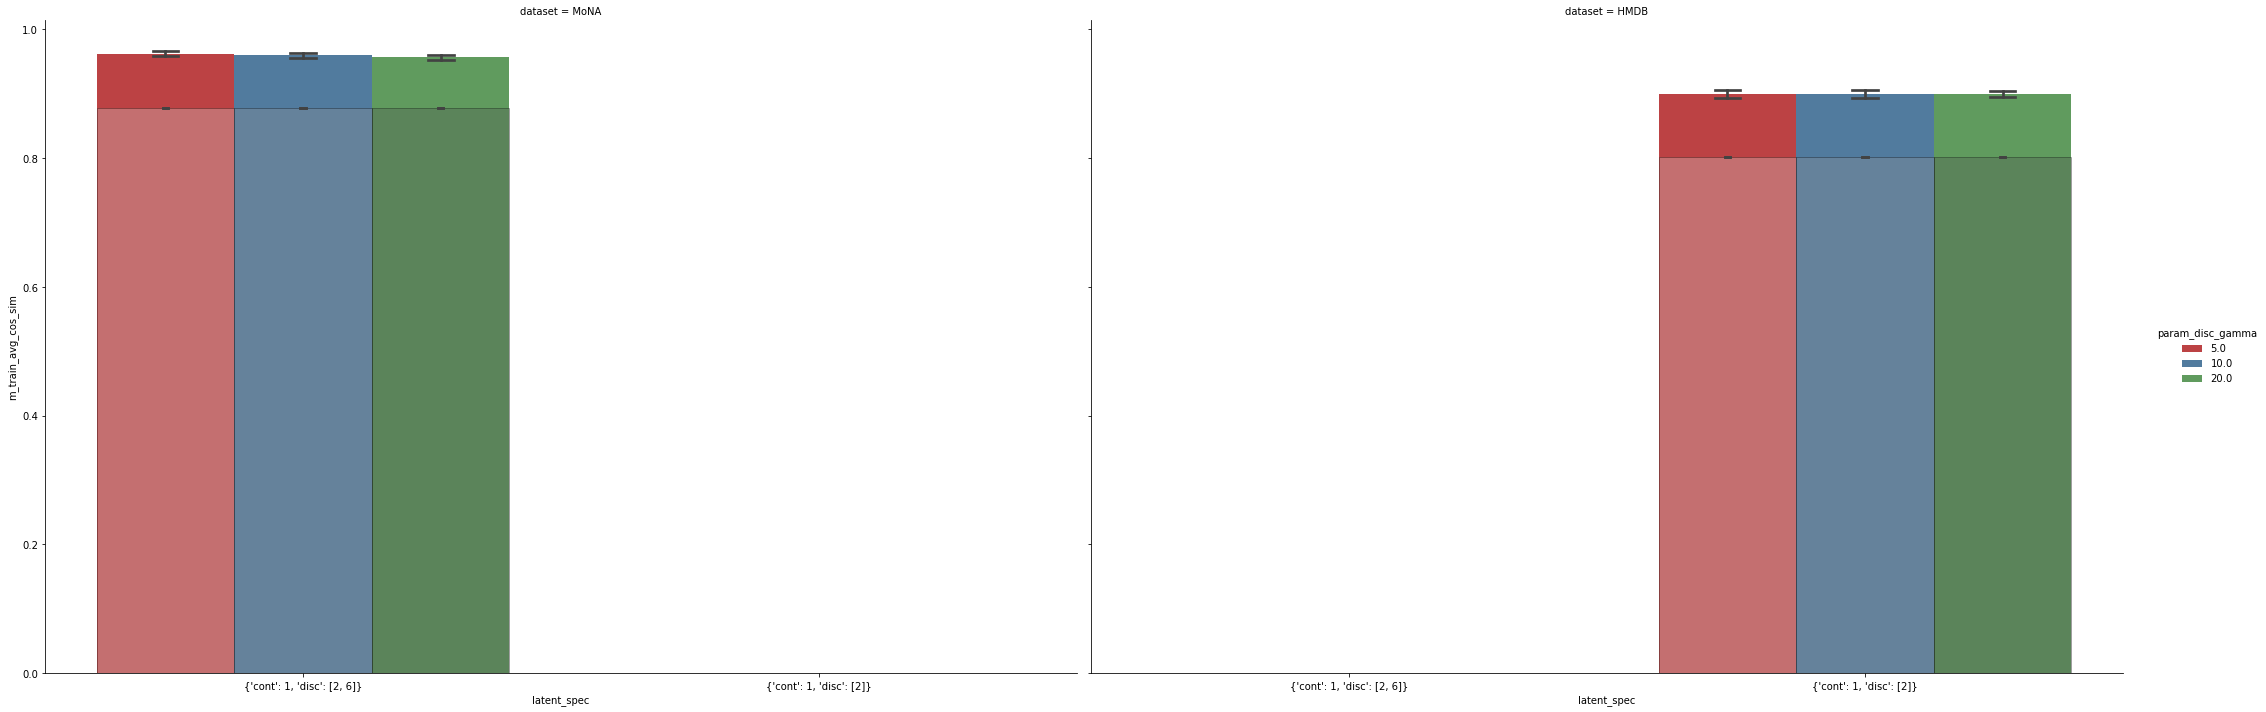

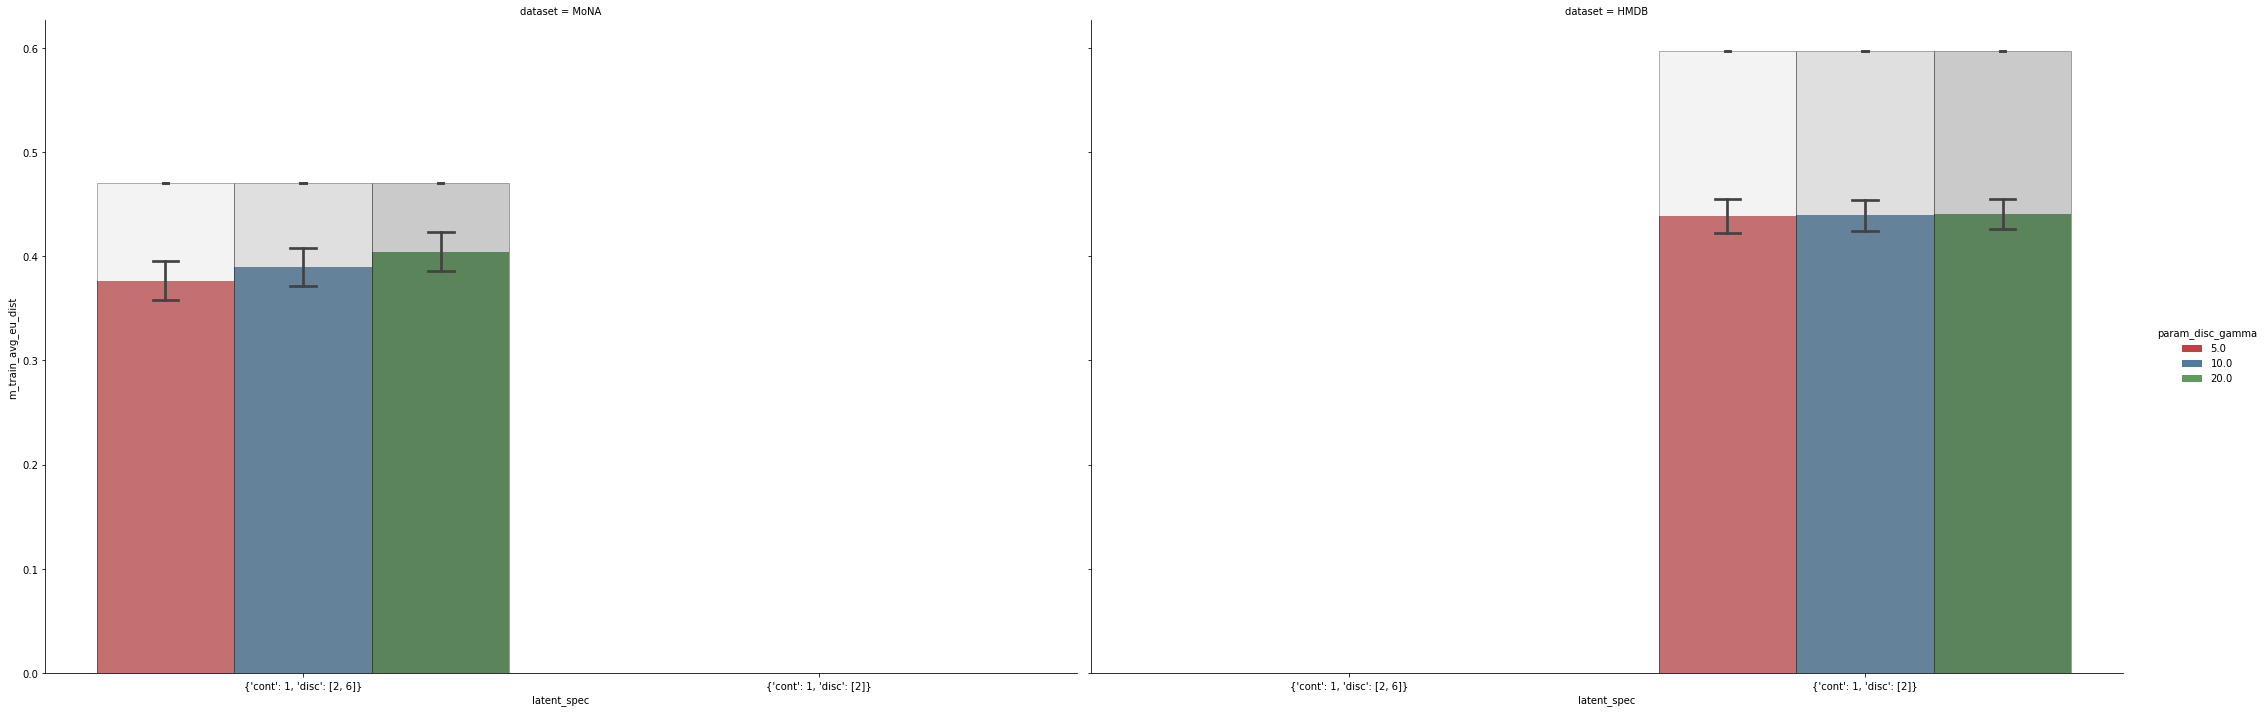

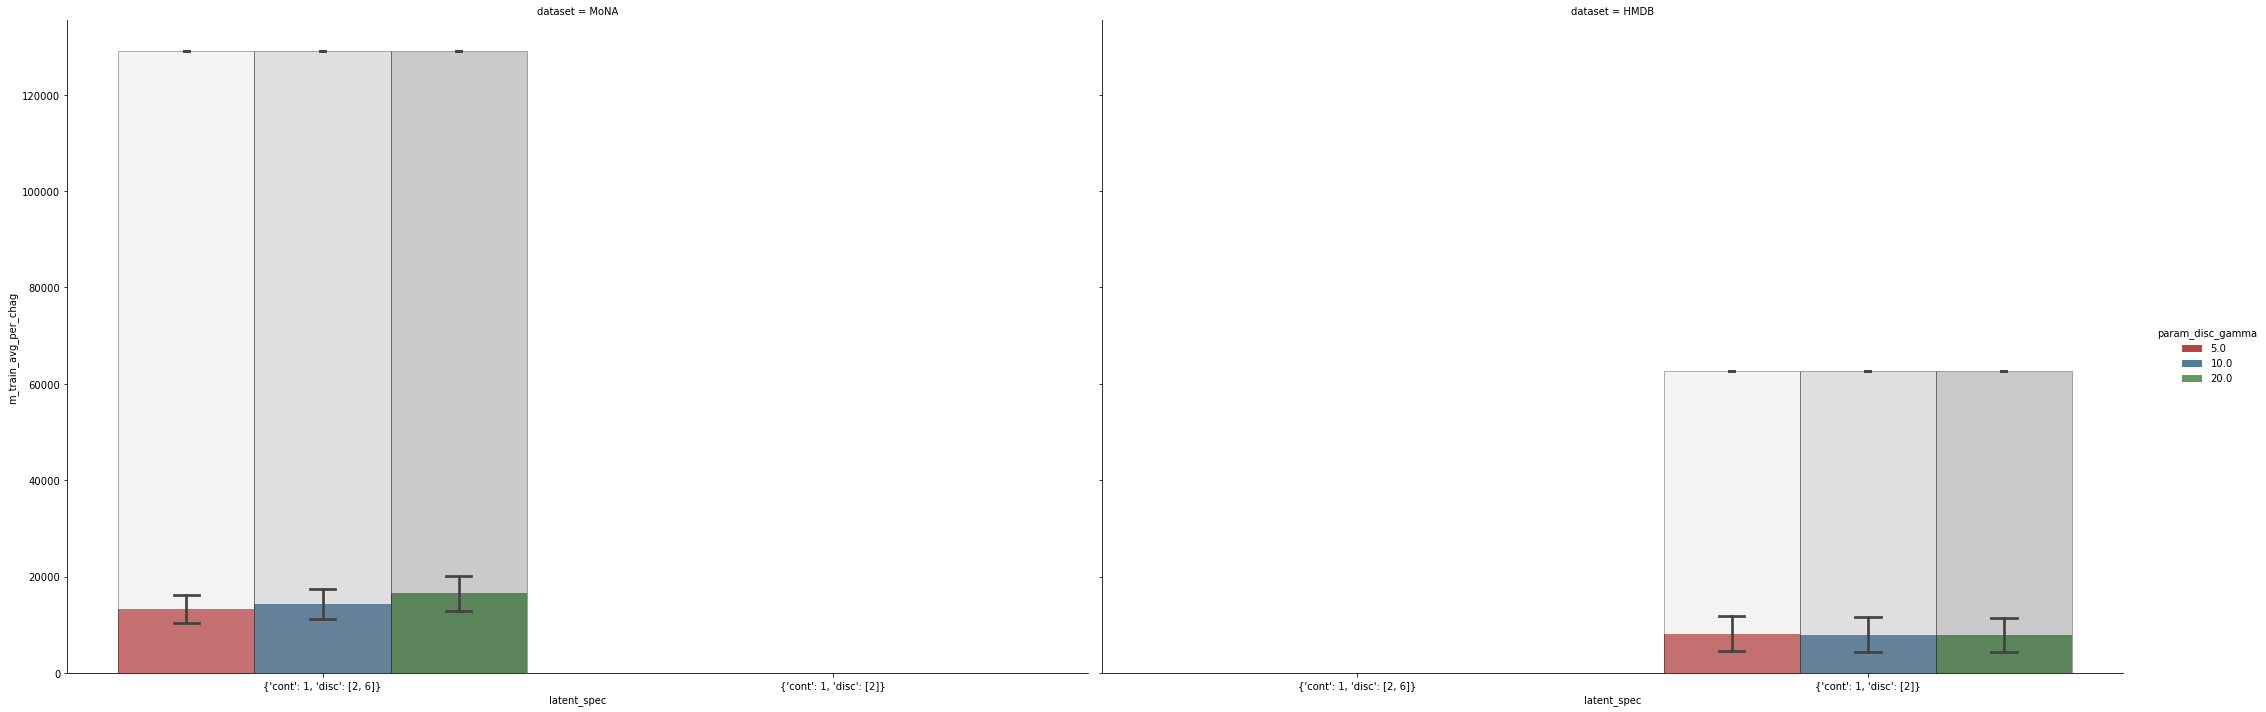

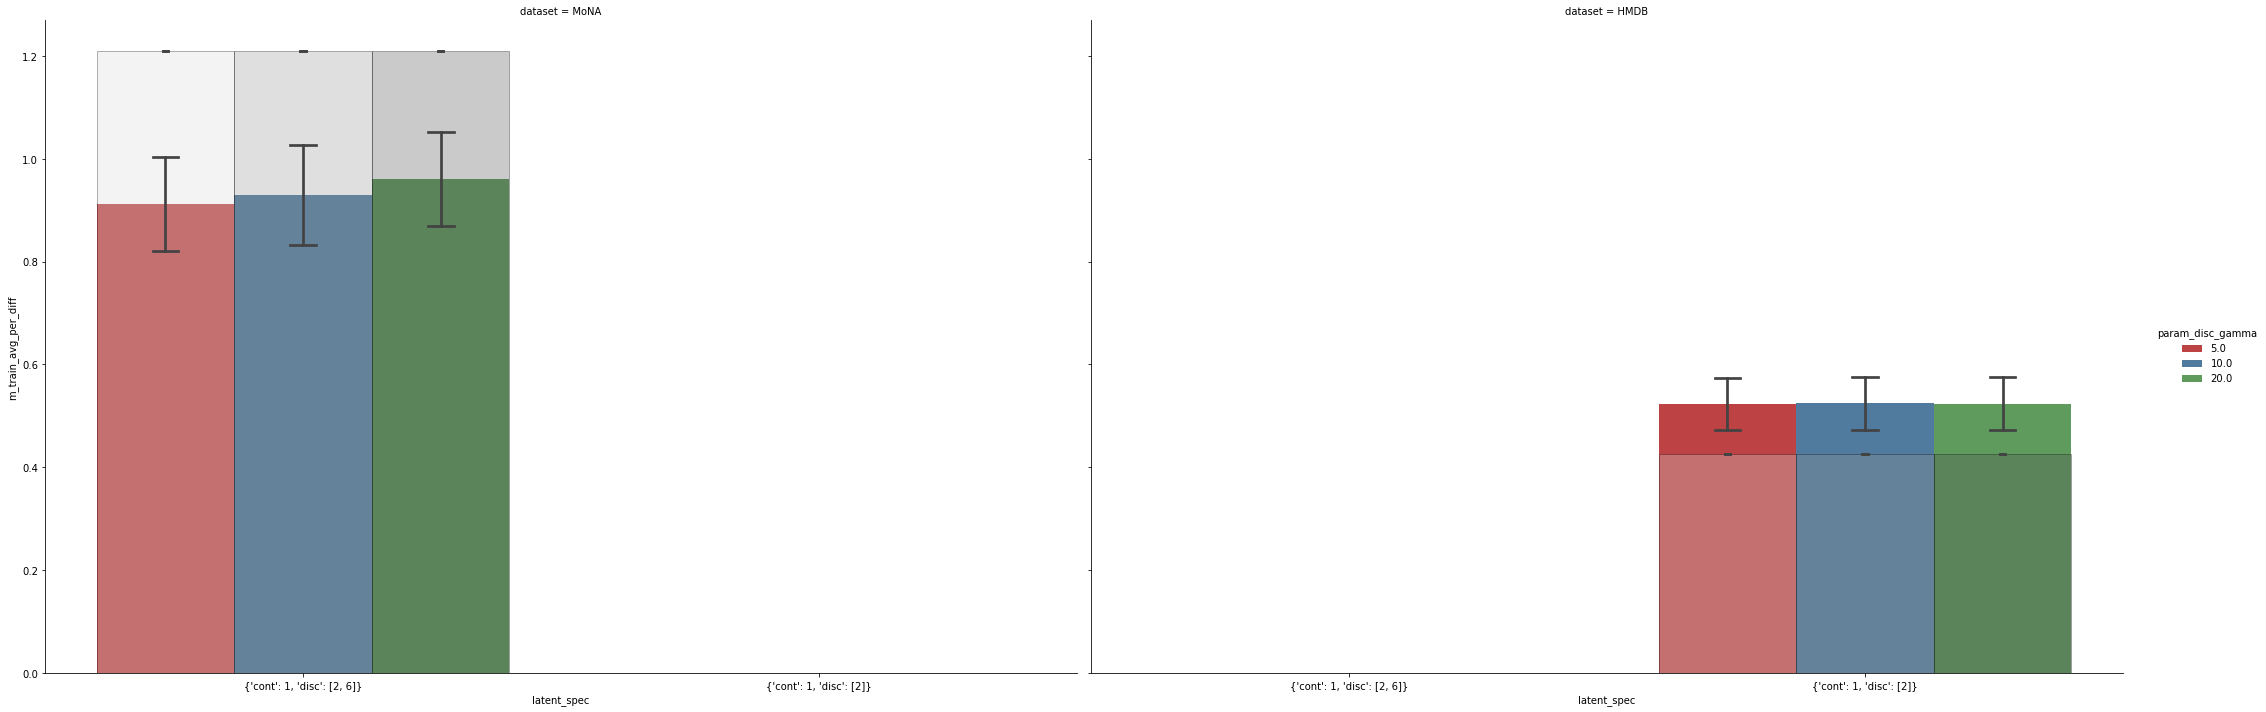

In [36]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x="latent_spec", y=column, col='dataset',
        hue='param_disc_gamma', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'latent_spec', avg_column, data=df, hue='param_disc_gamma', order=df['latent_spec'].unique().tolist(),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")